# EDSIGH ED-TECH EXPLORATORY DATA ANALYSIS

## About EDSIGH ED-TECH

EdSigh Ed-Tech is a globally recognized online learning platform that provides a wide range of courses on a variety of topics. Since its inception in 2010, EdSigh Ed-Tech has grown to become one of the world's largest e-learning platforms, serving millions of students and teachers worldwide. Their primary goal is to make education accessible and affordable to anyone with an internet connection. Teachers create and publish their courses on the platform, and students can enroll based on their interests and learning goals. EdSigh Ed-Tech offers certifications and training in courses, such as Business Finance, Graphics Design, Musical Instruments, and Web Development. EdSigh Ed-Tech 's extensive course catalog ranges from technology to business, art to personal growth.

## Problem Statement

The Director of the company wants to leverage the power of their data to gain insights into the business and improve their efficiency. EdSigh Ed-Tech seeks to understand the performance of each course.

## Project Goal

The Goal of this notebook is to:

- Explore every feature in the dataset,

- Uncover where potential opportunities to increase business revenue lie; e.g. Exploring the relationship between price and Num_Subscribers.

In [1]:
# Import libraries
import numpy as np #Data preprocessing
import pandas as pd #Data preprocessing
import matplotlib.pyplot as plt #Data visualization
import seaborn as sns #Data visualization
import plotly.express as px #Data visualization
import missingno as msno #Missing Data- #Data visualization
import statsmodels.api as sm  #For forecasting

In [2]:
# Load the dataset
df = pd.read_csv(r"C:\Users\EZ FARMING\Desktop\Seun Personal Docs\DATA SCIENCE\10ALYTICS INTERNSHIP\EdSigh Ed-Tech.csv")

In [3]:
# Print the top rows
df.head()

Course_ID  Num_Subscribers  \
0      49798            65576   
1      48841            56659   
2     133536            50855   
3     151668            29167   
4     648826            24481   

                                        Course_Title  Price  Num_Review  \
0  Bitcoin or How I Learned to Stop Worrying and ...      0         936   
1    Accounting in 60 Minutes - A Brief Introduction      0        4397   
2               Stock Market Investing for Beginners      0        2698   
3                 Introduction to Financial Modeling      0        1463   
4         The Complete Financial Analyst Course 2017    195        2347   

   Num_Lectures           Level  Rating  Content_Duration  \
0            24      All Levels    0.56               8.0   
1            16  Beginner Level    0.95               1.5   
2            15      All Levels    0.91               1.5   
3             8      All Levels    0.18               1.5   
4           174      All Levels    0.37              10.0   

    Published_Timestamp           Subject Date_Published Course_Type  
0  2013-04-20T02:25:22Z  Business Finance      4/20/2013        Free  
1  2013-04-07T21:39:25Z  Business Finance       4/7/2013        Free  
2  2013-12-25T19:53:34Z  Business Finance     12/25/2013        Free  
3  2014-05-27T16:22:16Z  Business Finance      5/27/2014        Free  
4  2016-01-21T01:38:48Z  Business Finance      1/21/2016        Paid

In [4]:
#Dimensionality of the Data- The number of rows and columns
df.shape

(3676, 13)

There are 3676 rows and 13 columns.

In [5]:
#Examine the columns/features of the data
df.columns

Index(['Course_ID', 'Num_Subscribers', 'Course_Title', 'Price', 'Num_Review',
       'Num_Lectures', 'Level', 'Rating', 'Content_Duration',
       'Published_Timestamp', 'Subject', 'Date_Published', 'Course_Type'],
      dtype='object')

In [6]:
#Investigate the dataset for anomalies and data types (Feature also means Column)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3676 entries, 0 to 3675
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Course_ID            3676 non-null   int64  
 1   Num_Subscribers      3676 non-null   int64  
 2   Course_Title         3676 non-null   object 
 3   Price                3676 non-null   int64  
 4   Num_Review           3676 non-null   int64  
 5   Num_Lectures         3676 non-null   int64  
 6   Level                3676 non-null   object 
 7   Rating               3676 non-null   float64
 8   Content_Duration     3676 non-null   float64
 9   Published_Timestamp  3676 non-null   object 
 10  Subject              3676 non-null   object 
 11  Date_Published       3676 non-null   object 
 12  Course_Type          3676 non-null   object 
dtypes: float64(2), int64(5), object(6)
memory usage: 373.5+ KB


In [7]:
# Numerical Statistical Analysis (Showing only the numerical columns)
df.describe().astype(int)

Course_ID  Num_Subscribers  Price  Num_Review  Num_Lectures  Rating  \
count       3676             3676   3676        3676          3676    3676   
mean      675753             3199     66         156            40       0   
std       343130             9486     61         935            50       0   
min         8324                0      0           0             0       0   
25%       407474              112     20           4            15       0   
50%       687692              912     45          18            25       0   
75%       960814             2558     95          67            46       0   
max      1282064           268923    200       27445           779       1   

       Content_Duration  
count              3676  
mean                  4  
std                   6  
min                   0  
25%                   1  
50%                   2  
75%                   4  
max                  78

In [8]:
# Categorical Statistical Analysis
df.describe(include=['object', 'bool'])

Course_Title       Level   Published_Timestamp  \
count                            3676        3676                  3676   
unique                           3663           4                  3672   
top     Acoustic Blues Guitar Lessons  All Levels  2017-02-07T17:20:39Z   
freq                                3        1925                     2   

                Subject Date_Published Course_Type  
count              3676           3676        3676  
unique                4           1210           2  
top     Web Development       5/1/2017        Paid  
freq               1203             21        3365

In [9]:
# Investigate the missing data
null_vals= df.isnull().sum()
null_vals

Course_ID              0
Num_Subscribers        0
Course_Title           0
Price                  0
Num_Review             0
Num_Lectures           0
Level                  0
Rating                 0
Content_Duration       0
Published_Timestamp    0
Subject                0
Date_Published         0
Course_Type            0
dtype: int64

In [10]:
#Check for duplicates
df.duplicated().sum()

0

In [11]:
# Unique values in categorical columns
print(df['Level'].unique())
print(df['Subject'].unique())
print(df['Course_Type'].unique())

['All Levels' 'Beginner Level' 'Intermediate Level' 'Expert Level']
['Business Finance' 'Graphic Design' 'Musical Instruments'
 'Web Development']
['Free' 'Paid']


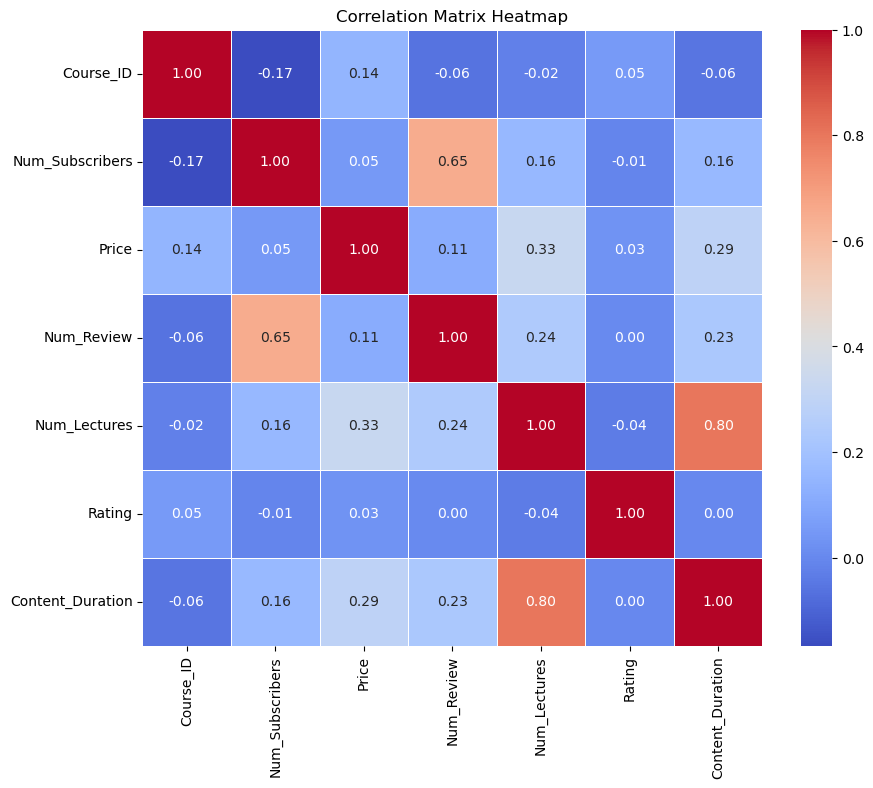

In [12]:
# Correlation between variables
# Calculate the correlation matrix
corr_matrix = df.corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

There is a slight correlation between Revenue and content duration, number of lectures.
There is a Strong correlation between revenue and number of subscribers, and number of review.


In [13]:
# Feature Engineering (Adding a column for Revenue)
df['Revenue'] = df['Num_Subscribers'] * df['Price']

## Exploratory Data Analysis

### Univariate Analysis

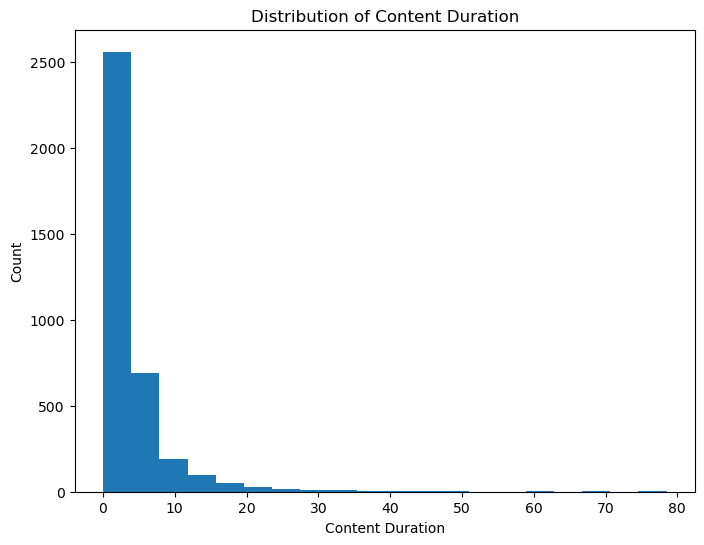

In [14]:
# Histogram of Content Duration
plt.figure(figsize=(8, 6))
plt.hist(df['Content_Duration'], bins=20)
plt.xlabel('Content Duration')
plt.ylabel('Count')
plt.title('Distribution of Content Duration')
plt.show()


Narration: 

Most of the courses have a duration between 0 to 10 minutes.

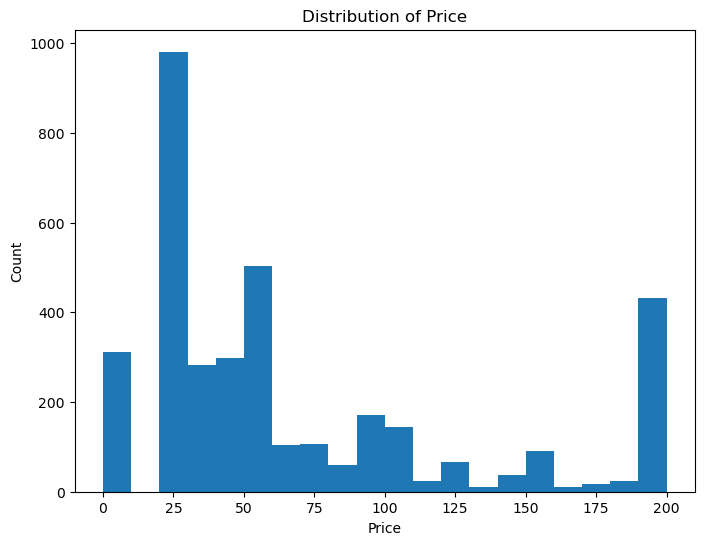

In [15]:
# Histogram of Price
plt.figure(figsize=(8, 6))
plt.hist(df['Price'], bins=20)
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Distribution of Price')
plt.show()

Prices of courses range between 0 and $ 200. Most of the courses are $ 25.

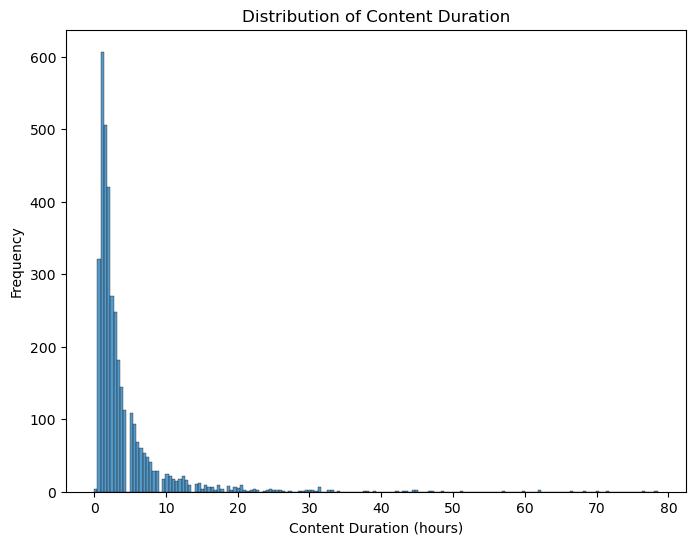

In [16]:
# Distribution of Content Duration
plt.figure(figsize=(8, 6))
sns.histplot(df['Content_Duration'])
plt.xlabel('Content Duration (hours)')
plt.ylabel('Frequency')
plt.title('Distribution of Content Duration')
plt.show()

Course content duration are between some minutes and 34 hours. 

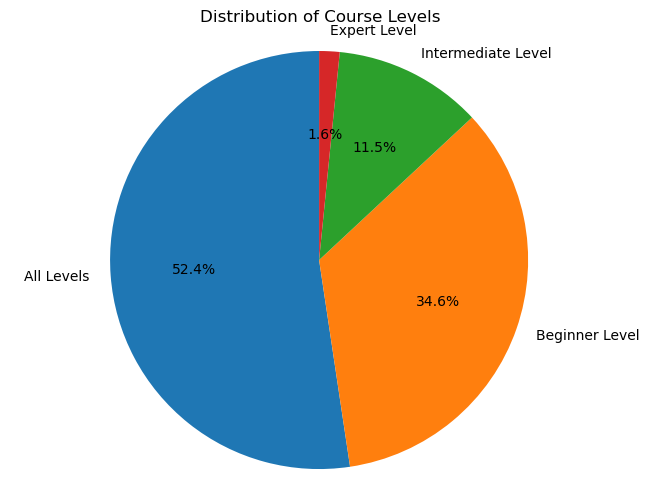

In [17]:
# Analyze the unique levels and their frequency counts.
level_counts = df['Level'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(level_counts, labels=level_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Course Levels')
plt.axis('equal')
plt.show()

Half of the courses are All level courses, followed by Beginner Level courses, the intermediate, and the least are the Expert level courses.

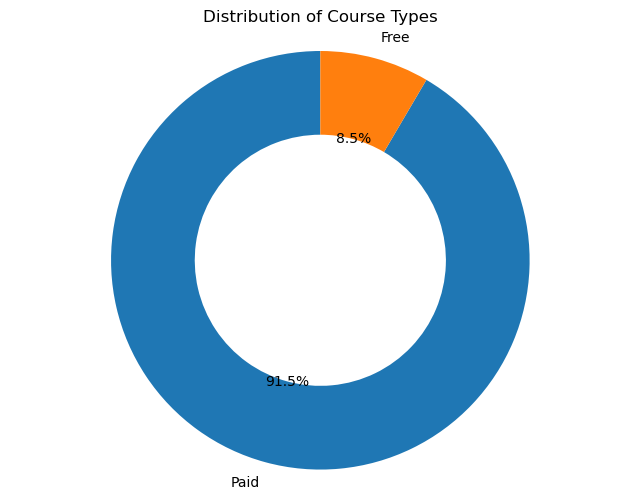

In [18]:
# Course type distribution
course_type_counts = df['Course_Type'].value_counts()

# Create a doughnut chart
plt.figure(figsize=(8, 6))
plt.pie(course_type_counts, labels=course_type_counts.index, autopct='%1.1f%%', startangle=90,
        wedgeprops=dict(width=0.4))
plt.title('Distribution of Course Types')
plt.gca().add_artist(plt.Circle((0, 0), 0.3, color='white'))
plt.axis('equal')
plt.show()

About 8.5% of the courses are free while the rest are paid courses.

### Time Series Analysis

In [19]:
#Convert the Date column into a pandas datetime object
df['Published_Timestamp'] = pd.to_datetime(df['Published_Timestamp'])

df.info()

#Extract the year, month, quarter
df['year'] = df['Published_Timestamp'].dt.year
df['month'] = df['Published_Timestamp'].dt.month
df['month_name'] = df['Published_Timestamp'].dt.month_name()
df['quarter'] = df['Published_Timestamp'].dt.quarter
df['time'] = df['Published_Timestamp'].dt.time

df.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3676 entries, 0 to 3675
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   Course_ID            3676 non-null   int64              
 1   Num_Subscribers      3676 non-null   int64              
 2   Course_Title         3676 non-null   object             
 3   Price                3676 non-null   int64              
 4   Num_Review           3676 non-null   int64              
 5   Num_Lectures         3676 non-null   int64              
 6   Level                3676 non-null   object             
 7   Rating               3676 non-null   float64            
 8   Content_Duration     3676 non-null   float64            
 9   Published_Timestamp  3676 non-null   datetime64[ns, UTC]
 10  Subject              3676 non-null   object             
 11  Date_Published       3676 non-null   object             
 12  Course_Type         

Course_ID  Num_Subscribers  \
0      49798            65576   
1      48841            56659   

                                        Course_Title  Price  Num_Review  \
0  Bitcoin or How I Learned to Stop Worrying and ...      0         936   
1    Accounting in 60 Minutes - A Brief Introduction      0        4397   

   Num_Lectures           Level  Rating  Content_Duration  \
0            24      All Levels    0.56               8.0   
1            16  Beginner Level    0.95               1.5   

        Published_Timestamp           Subject Date_Published Course_Type  \
0 2013-04-20 02:25:22+00:00  Business Finance      4/20/2013        Free   
1 2013-04-07 21:39:25+00:00  Business Finance       4/7/2013        Free   

   Revenue  year  month month_name  quarter      time  
0        0  2013      4      April        2  02:25:22  
1        0  2013      4      April        2  21:39:25

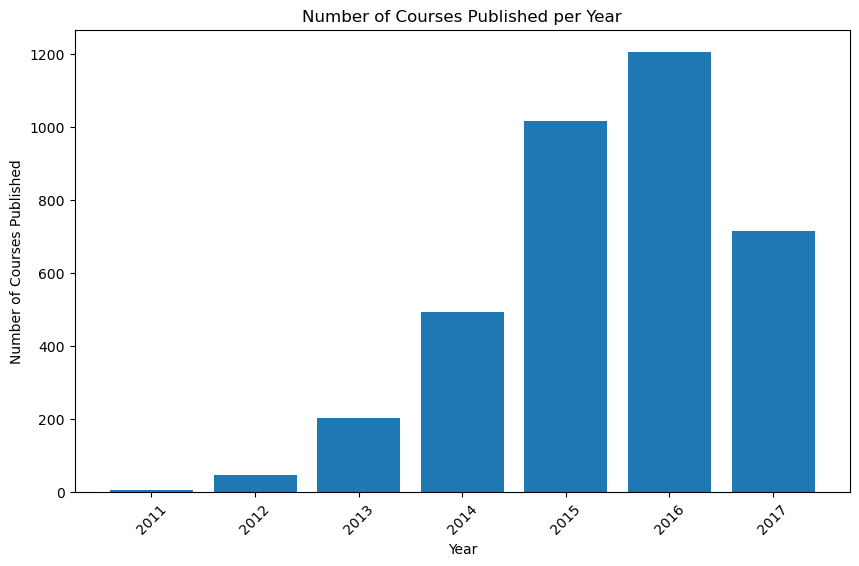

In [20]:
# Count the number of courses published per year
courses_per_year = df['year'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(courses_per_year.index, courses_per_year.values)
plt.xlabel('Year')
plt.ylabel('Number of Courses Published')
plt.title('Number of Courses Published per Year')
plt.xticks(rotation=45)
plt.show()

The highest number of courses were published in 2016, followed by 2015. 

There was an increase in the number of courses published from 2011 to 2016 and then there was a decline in 2017.

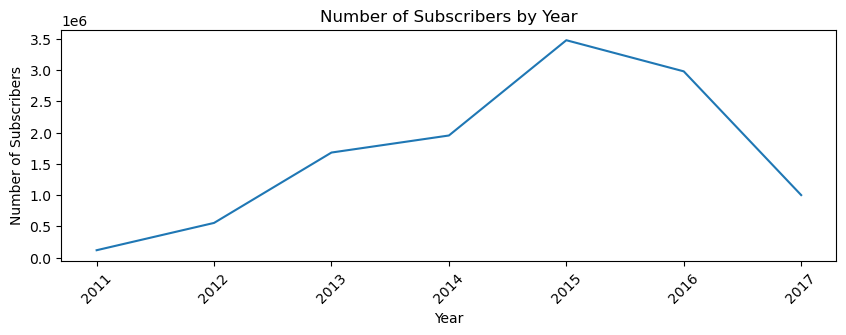

In [21]:
# Group by year and calculate the total number of subscribers
df_grouped = df.groupby('year').sum()['Num_Subscribers'].reset_index()

# Plotting the number of subscribers by year
plt.figure(figsize=(10, 3))
plt.plot(df_grouped['year'], df_grouped['Num_Subscribers'])
plt.xlabel('Year')
plt.ylabel('Number of Subscribers')
plt.title('Number of Subscribers by Year')
plt.xticks(rotation=45)
plt.show()

The total number of subscribers rose from year 2011 to 2015 and then started declining till the last rcorded year, 2017. 

What could have caused the decline?

It was expected that the largest number of subscribers would be recorded in 2016 because more courses were published then but that's not the case.

There is need to check out the courses sold per year, their prices, levels and revenue.

#### Analyzing what happened in each year

In [22]:
df['Subject'].value_counts()

Web Development        1203
Business Finance       1191
Musical Instruments     680
Graphic Design          602
Name: Subject, dtype: int64

Courses Performance

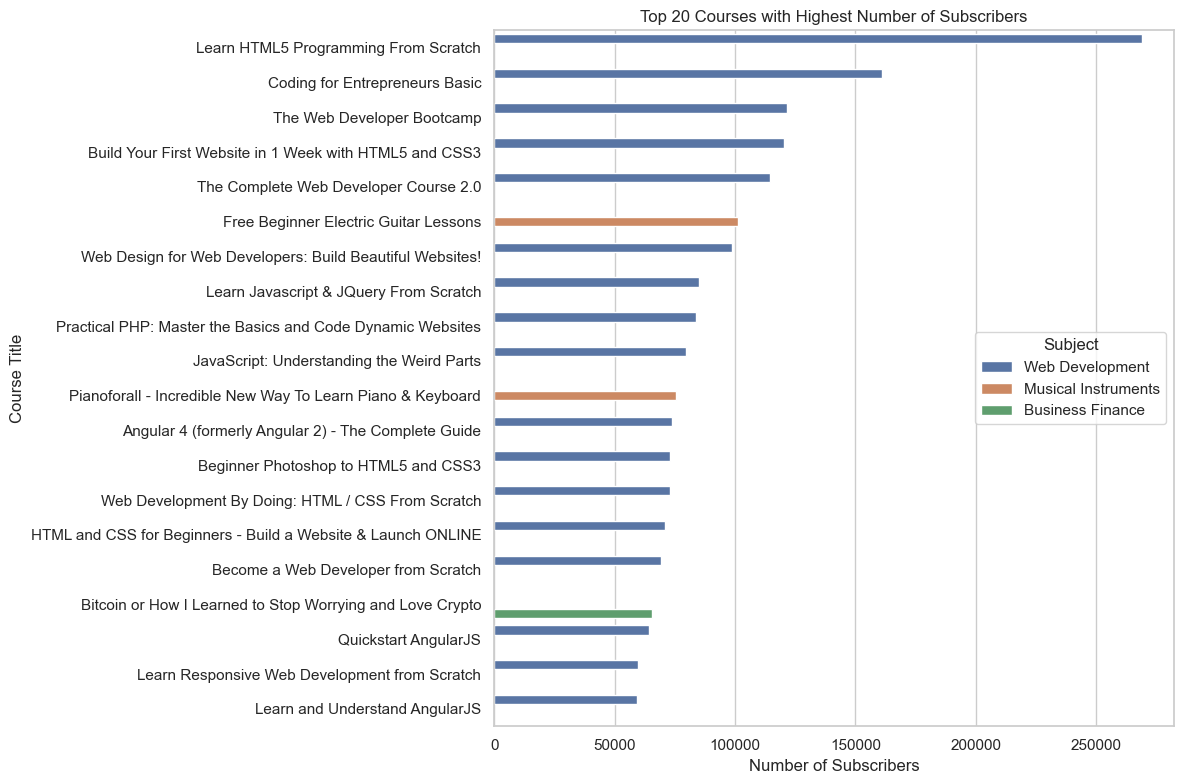

In [23]:
# Sort the DataFrame by number of subscribers in descending order
df_sorted = df.sort_values('Num_Subscribers', ascending=False)

# Select the top 20 courses with the highest number of subscribers
top_20_subscribers = df_sorted.head(20)

# Set the style for the plot
sns.set(style="whitegrid")

# Visualize the top 20 courses with the highest number of subscribers
plt.figure(figsize=(12, 8))
sns.barplot(x='Num_Subscribers', y='Course_Title', hue='Subject', data=top_20_subscribers, orient='h')
plt.xlabel('Number of Subscribers')
plt.ylabel('Course Title')
plt.title('Top 20 Courses with Highest Number of Subscribers')
plt.tight_layout()
plt.legend(title='Subject')
plt.show()


Out of the top 20 courses with the highest number of subscribers, 17 belong to the Web development subject while 2 belong to the Musical Instrument and then the last one belong to the business finance subject.

This shows clearly to us that the most populous courses are the web development courses.

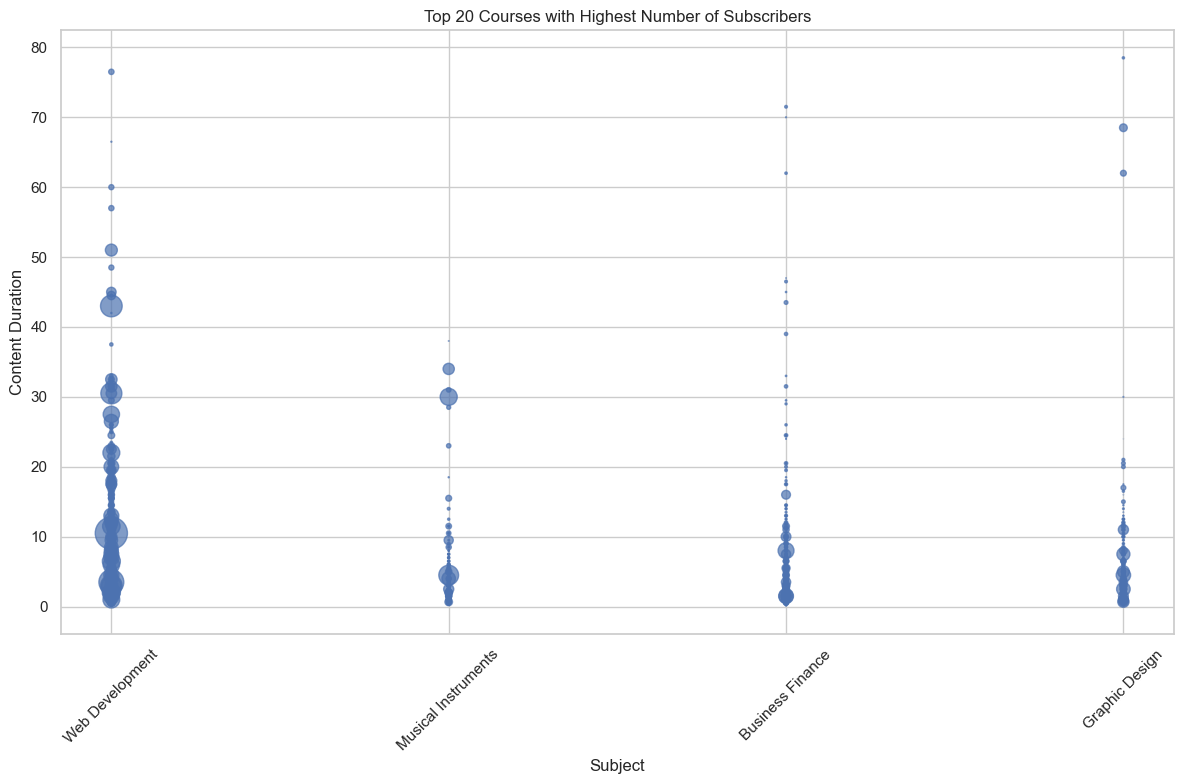

In [24]:
# Sort the DataFrame by number of subscribers in descending order
df_sorted = df.sort_values('Num_Subscribers', ascending=False)

# Set the style for the plot
sns.set(style="whitegrid")

# Set the size of the bubbles based on the number of subscribers
bubble_sizes = df_sorted['Num_Subscribers'] / 500

# Visualize the course content duration and the number of subscribers using a bubble chart
plt.figure(figsize=(12, 8))
plt.scatter(x='Subject', y='Content_Duration', s=bubble_sizes, alpha=0.7, data=df_sorted)
plt.xlabel('Subject')
plt.ylabel('Content Duration')
plt.title('Top 20 Courses with Highest Number of Subscribers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Most of the courses heavily subscribed to have a course duration between 0 to 50 hours.

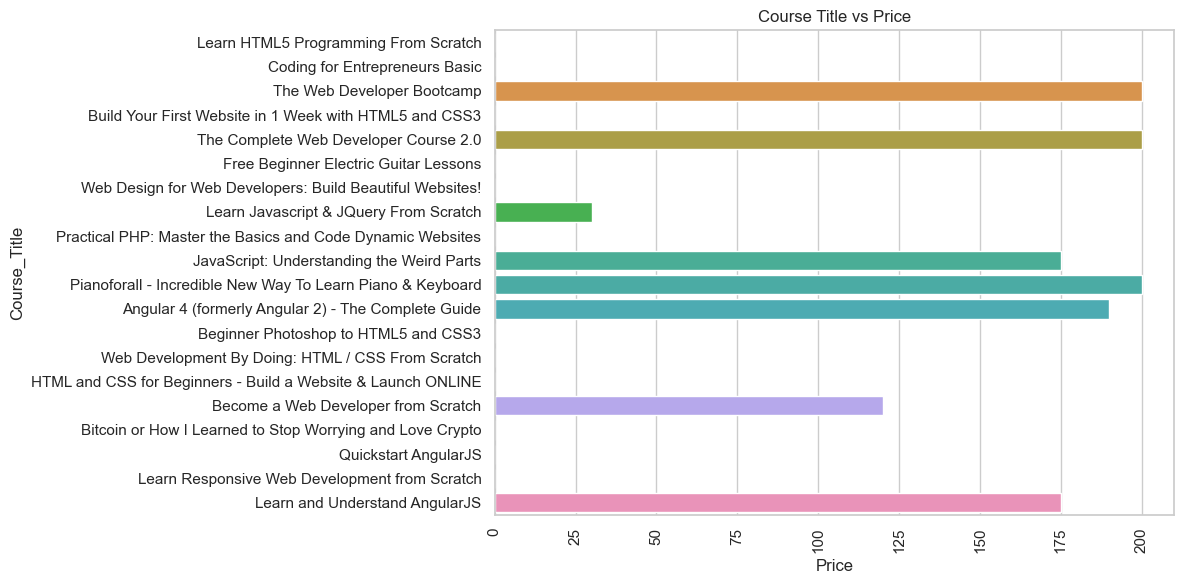

In [25]:
# Set the style for the plot
sns.set(style="whitegrid")

# Select the top 20 courses with the highest number of subscribers
top_20_subscribers = df.sort_values('Num_Subscribers', ascending=False).head(20)

# Visualize the course title vs price
plt.figure(figsize=(12, 6))
sns.barplot(x='Price', y='Course_Title', data=top_20_subscribers, orient='h')
plt.xticks(rotation=90)
plt.xlabel('Price')
plt.ylabel('Course_Title')
plt.title('Course Title vs Price')
plt.tight_layout()
plt.show()


Most of the 20 top courses are free.

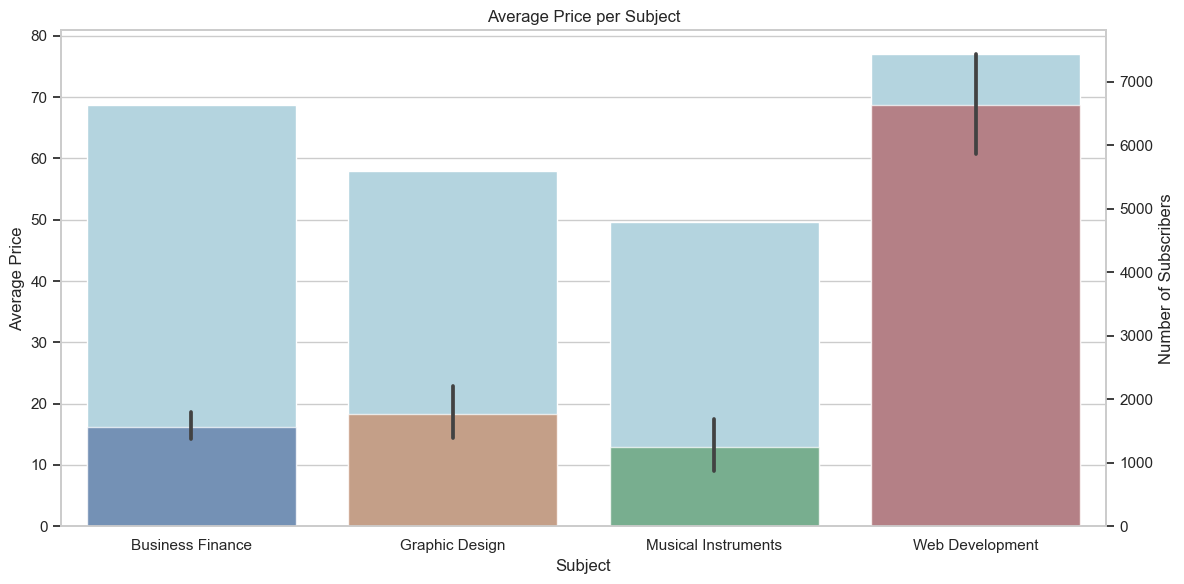

In [26]:
# Calculate the average price per subject
average_price_per_subject = df.groupby('Subject')['Price'].mean().reset_index()

# Sort the DataFrame by the number of subscribers in descending order
df_sorted = df.sort_values('Num_Subscribers', ascending=False)

# Set the style for the plot
sns.set(style="whitegrid")

# Create a combined plot of average price and number of subscribers
fig, ax1 = plt.subplots(figsize=(12, 6))
sns.barplot(x='Subject', y='Price', data=average_price_per_subject, ax=ax1, color='lightblue')
ax1.set_ylabel('Average Price')
ax1.set_xlabel('Subject')
ax1.set_title('Average Price per Subject')

ax2 = ax1.twinx()
sns.barplot(x='Subject', y='Num_Subscribers', data=df, ax=ax2, alpha=0.7)
ax2.set_ylabel('Number of Subscribers')
ax2.grid(False)

plt.tight_layout()
plt.show()


An average price of a web development course is about $78 followed by business finance. This means that despite the fact that some web development courses may be expensive, they will subscribe more to it because of the value they will get from the course eventually. Tech (Web development) is a highly rewarding field.

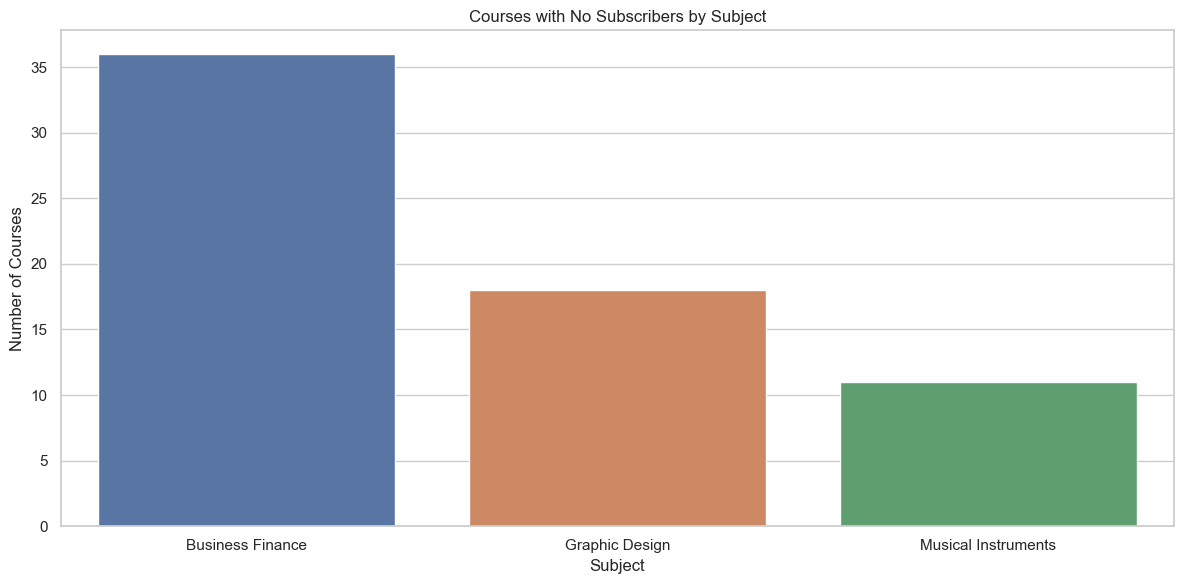

In [27]:
# Filter the dataset to courses with no subscribers
not_subscribed_courses = df[df['Num_Subscribers'] == 0]

# Group the not subscribed courses by subject and count the occurrences
not_subscribed_by_subject = not_subscribed_courses.groupby('Subject').size().reset_index(name='Count')

# Set the style for the plot
sns.set(style="whitegrid")

# Visualize the courses with no subscribers by subject
plt.figure(figsize=(12, 6))
sns.barplot(x='Subject', y='Count', data=not_subscribed_by_subject)
plt.xlabel('Subject')
plt.ylabel('Number of Courses')
plt.title('Courses with No Subscribers by Subject')
plt.tight_layout()
plt.show()


The graph gives us an idea of subjects with courses that were not subscribed to at all. 

We can see here that all the web development courses were subscribed to. 

About 65 courses were not subscribed to at all.

In [28]:
# Filter the dataset to courses with no subscribers
not_subscribed_courses = df[df['Num_Subscribers'] == 0]

# Select the Course_Title and Subject columns for the not subscribed courses
not_subscribed_courses = not_subscribed_courses[['Course_Title', 'Subject', 'Price', 'Level', 'Content_Duration']]

# Display the complete list of courses not subscribed to with their corresponding subjects
print(not_subscribed_courses.to_string(index=False))


                                                Course_Title             Subject  Price              Level  Content_Duration
                                           Basic Bookkeeping    Business Finance     35     Beginner Level          0.733333
   Options Trading Foundation: Your journey to competency...    Business Finance     95         All Levels          1.000000
                           Core Financial Statement Concepts    Business Finance     50         All Levels          1.500000
                           CFA Level 2- Quantitative Methods    Business Finance     40         All Levels          5.500000
   Credit concepts and checklist for bankers, credit analyst    Business Finance     20     Beginner Level          2.500000
          Planning and Executing a Financial Statement Audit    Business Finance     50         All Levels          2.000000
                       Best Practices in Corporate Budgeting    Business Finance     50 Intermediate Level          2.000000


These are the courses not subscribed to at all. These courses can be replaced with courses that will attract subscribers.

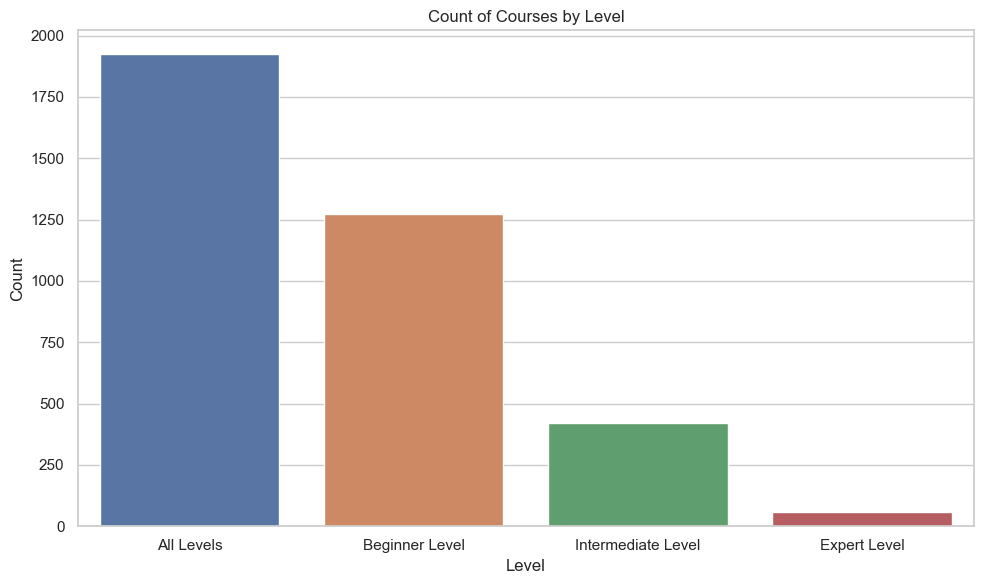

In [29]:
# Count the number of courses in each level
level_counts = df['Level'].value_counts()

# Set the style for the plot
sns.set(style="whitegrid")

# Create a bar plot of count vs levels
plt.figure(figsize=(10, 6))
sns.barplot(x=level_counts.index, y=level_counts.values)
plt.xlabel('Level')
plt.ylabel('Count')
plt.title('Count of Courses by Level')
plt.tight_layout()
plt.show()


This shows that 'All Level' courses are the highest number of courses published, followed by the Beginner Level courses, then the intermediate and the least are the Expert level courses.

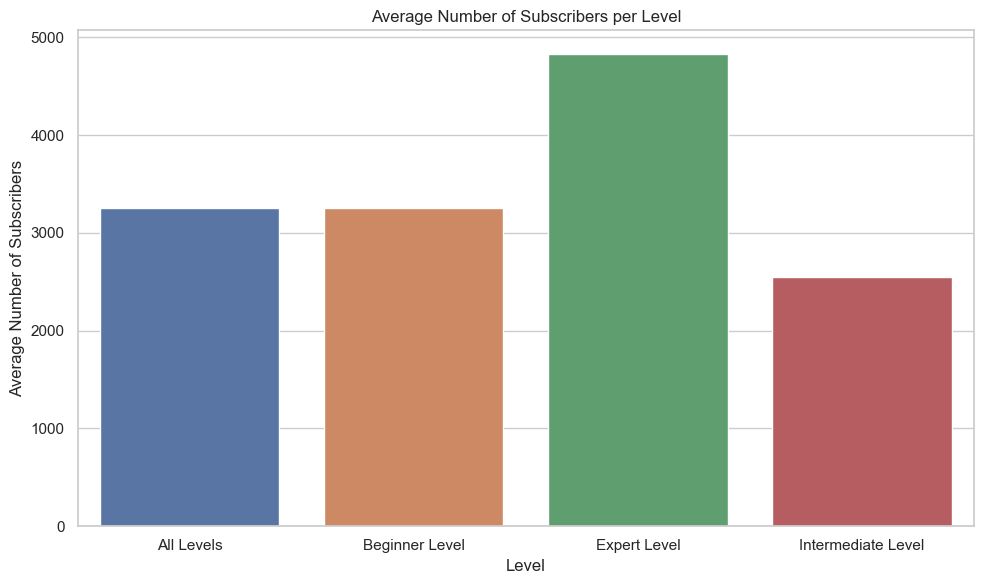

In [30]:
# Calculate the average number of subscribers per level
average_subscribers_per_level = df.groupby('Level')['Num_Subscribers'].mean()

# Set the style for the plot
sns.set(style="whitegrid")

# Create a bar plot of average number of subscribers vs level
plt.figure(figsize=(10, 6))
sns.barplot(x=average_subscribers_per_level.index, y=average_subscribers_per_level.values)
plt.xlabel('Level')
plt.ylabel('Average Number of Subscribers')
plt.title('Average Number of Subscribers per Level')
plt.tight_layout()
plt.show()


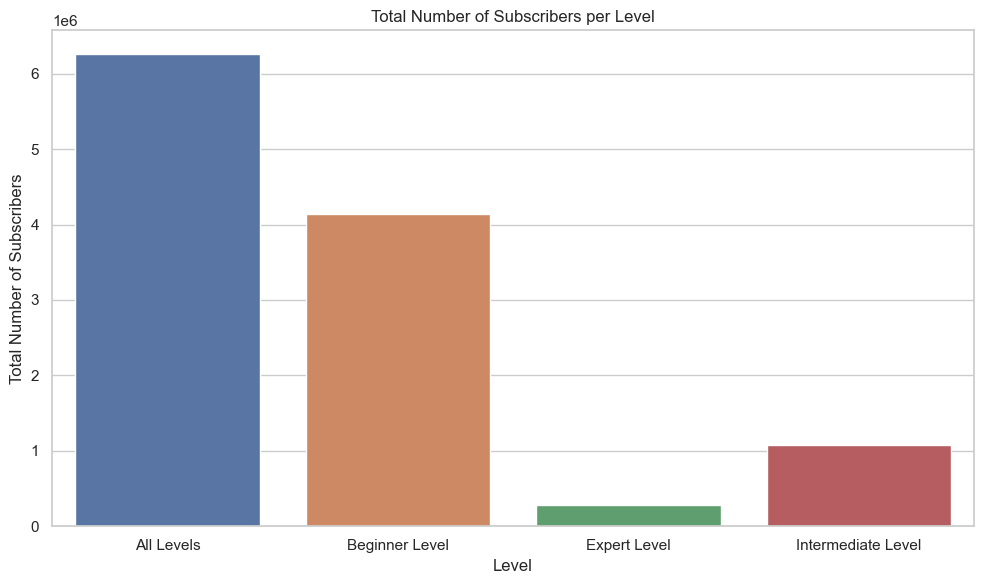

In [31]:
# Calculate the total number of subscribers per level
total_subscribers_per_level = df.groupby('Level')['Num_Subscribers'].sum()

# Set the style for the plot
sns.set(style="whitegrid")

# Create a bar plot of total number of subscribers vs level
plt.figure(figsize=(10, 6))
sns.barplot(x=total_subscribers_per_level.index, y=total_subscribers_per_level.values)
plt.xlabel('Level')
plt.ylabel('Total Number of Subscribers')
plt.title('Total Number of Subscribers per Level')
plt.tight_layout()
plt.show()


All level courses have the largest sum of subscribers because All level courses are the highest number of courses published.

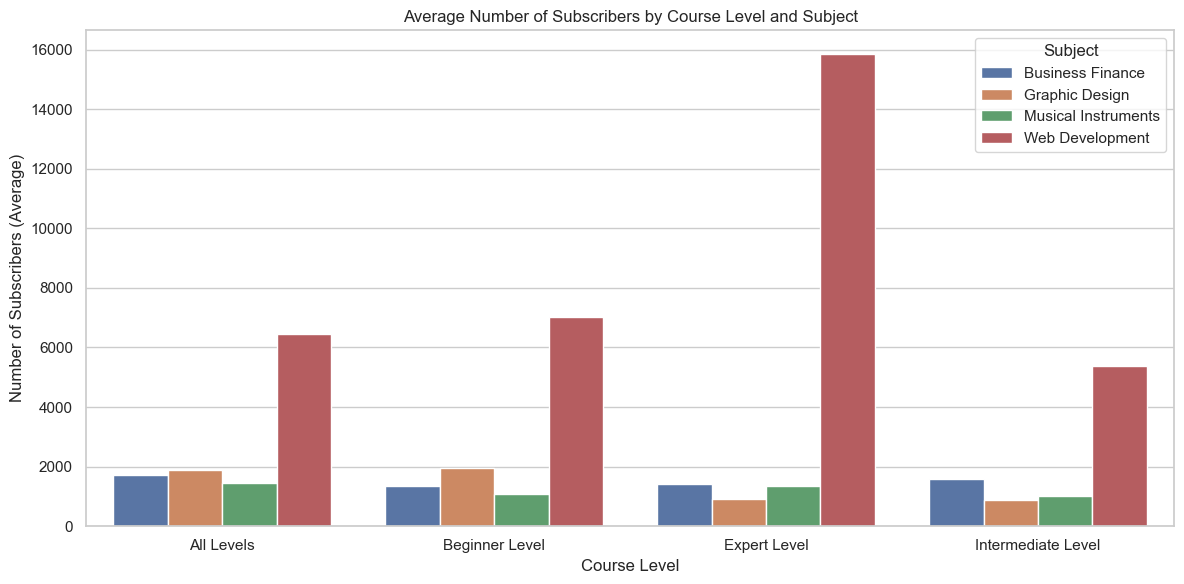

In [32]:
# Set the style for the plot
sns.set(style="whitegrid")

# Group the dataset by course level and subject, and calculate the count of subscribers
level_subject_subscribers = df.groupby(['Level', 'Subject'])['Num_Subscribers'].mean().reset_index()

# Visualize the level and subject vs number of subscribers
plt.figure(figsize=(12, 6))
sns.barplot(x='Level', y='Num_Subscribers', hue='Subject', data=level_subject_subscribers)
plt.xlabel('Course Level')
plt.ylabel('Number of Subscribers (Average)')
plt.title('Average Number of Subscribers by Course Level and Subject')
plt.tight_layout()
plt.legend(title='Subject')
plt.show()


Expert Level website development courses have the highest average number of subscribers than the other levels.

Beginner and All levels graphic design courses have more average number of subscribers than the other levels.

All levels and Expert level musical instrument courses have more average average number of subscribers than the other levels.


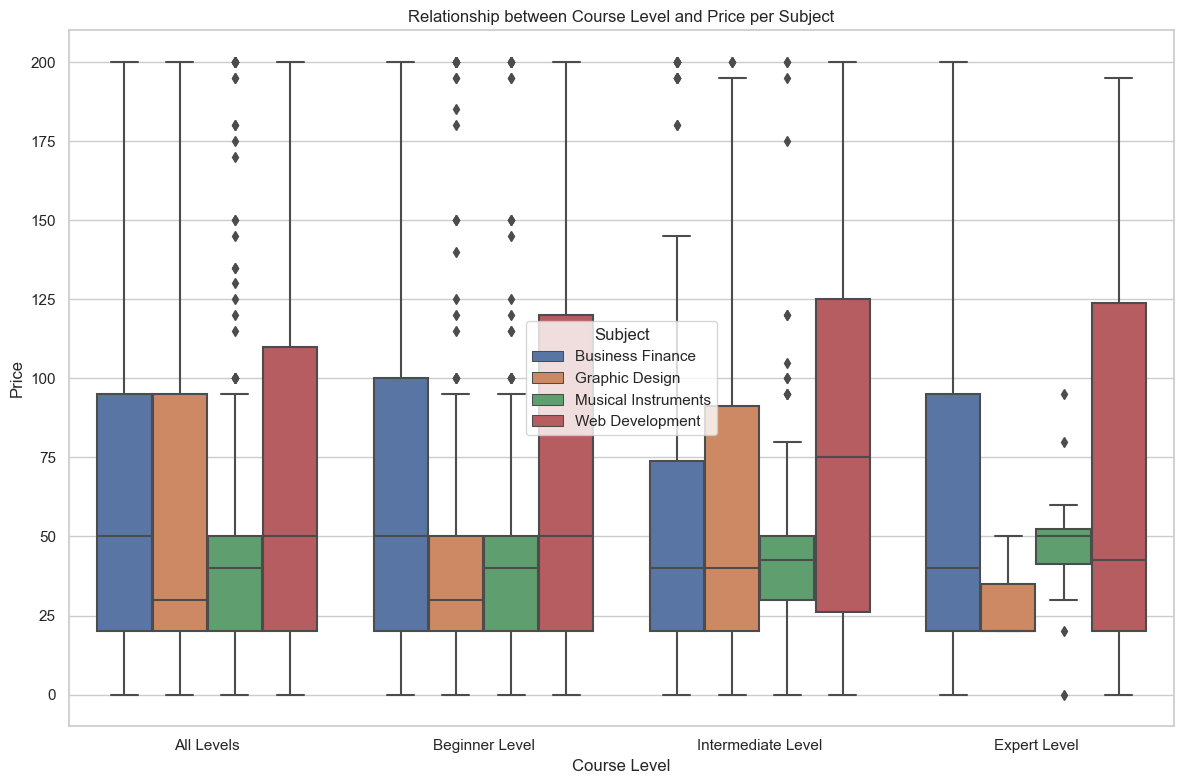

In [33]:
# Set the style for the plot
sns.set(style="whitegrid")

# Create a box plot of course levels and prices per subject
plt.figure(figsize=(12, 8))
sns.boxplot(x='Level', y='Price', hue='Subject', data=df)
plt.xlabel('Course Level')
plt.ylabel('Price')
plt.title('Relationship between Course Level and Price per Subject')
plt.tight_layout()
plt.legend(title='Subject')
plt.show()


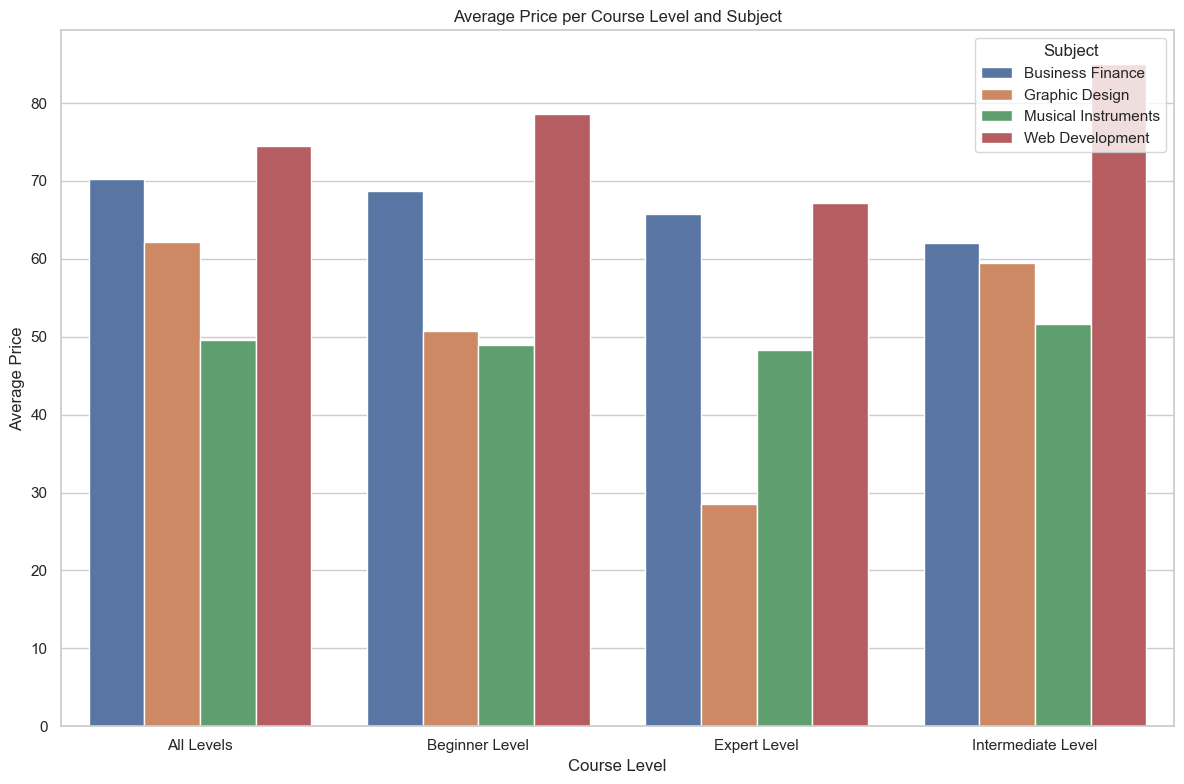

In [34]:
# Calculate the average price per subject and level
average_price_per_subject_level = df.groupby(['Subject', 'Level'])['Price'].mean().reset_index()

# Set the style for the plot
sns.set(style="whitegrid")

# Create a bar plot of course levels and average prices per subject
plt.figure(figsize=(12, 8))
sns.barplot(x='Level', y='Price', hue='Subject', data=average_price_per_subject_level)
plt.xlabel('Course Level')
plt.ylabel('Average Price')
plt.title('Average Price per Course Level and Subject')
plt.tight_layout()
plt.legend(title='Subject')
plt.show()


From the plot above, it is seen that expert level courses in all the subjects are the cheapest except for business finance courses.

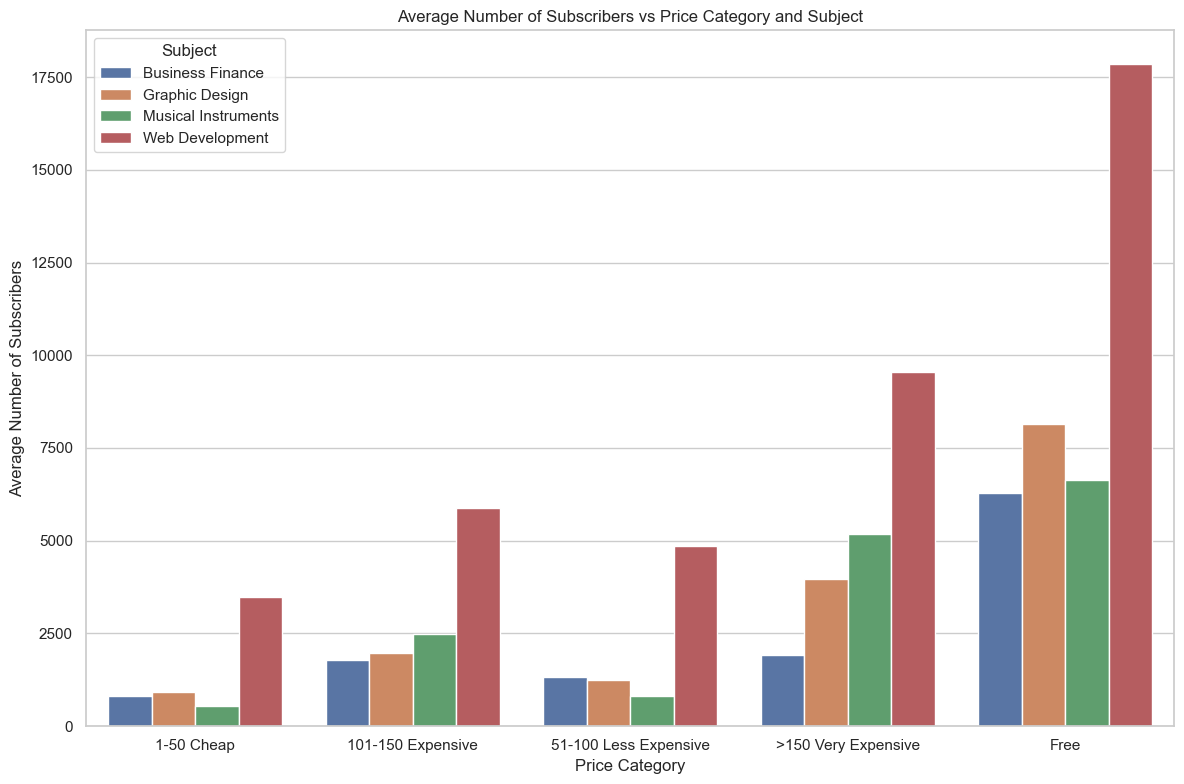

In [35]:
# Group the prices into different categories
def price_category(price):
    if price == 0:
        return 'Free'
    elif price <= 50:
        return '1-50 Cheap'
    elif price <= 100:
        return '51-100 Less Expensive'
    elif price <= 150:
        return '101-150 Expensive'
    else:
        return '>150 Very Expensive'

df['Price_Category'] = df['Price'].apply(price_category)

# Calculate the average number of subscribers per price category and subject
avg_subscribers_per_category_subject = df.groupby(['Price_Category', 'Subject'])['Num_Subscribers'].mean().reset_index()

# Set the style for the plot
sns.set(style="whitegrid")

# Create a bar plot of average number of subscribers against price category and subject
plt.figure(figsize=(12, 8))
sns.barplot(x='Price_Category', y='Num_Subscribers', hue='Subject', data=avg_subscribers_per_category_subject)
plt.xlabel('Price Category')
plt.ylabel('Average Number of Subscribers')
plt.title('Average Number of Subscribers vs Price Category and Subject')
plt.tight_layout()
plt.legend(title='Subject')
plt.show()

Majority of the subscribers subscribed to Free courses. However, despite the increase in price customers subscribed to courses with expensive and very expensive courses because probably they got value for their money. 


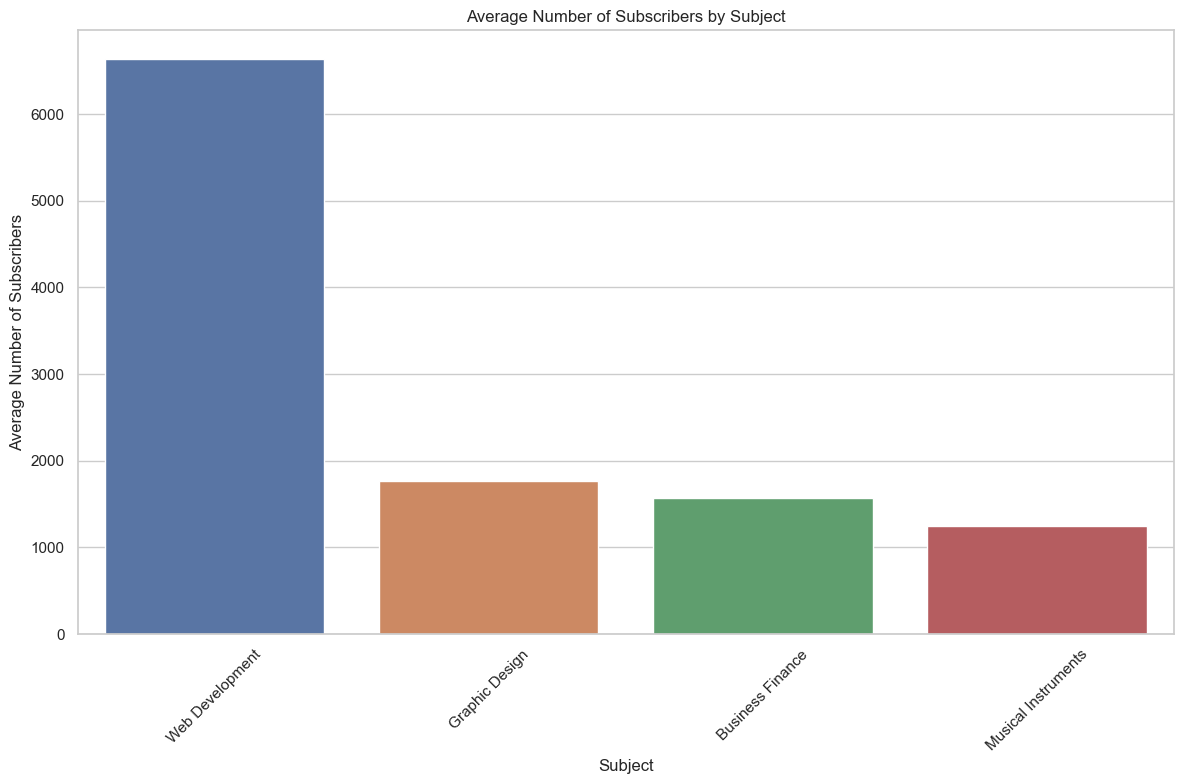

In [36]:
# Calculate the average number of subscribers per subject
average_subscribers_by_subject = df.groupby('Subject')['Num_Subscribers'].mean().sort_values(ascending=False)

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(12, 8))

# Create the bar plot
sns.barplot(x=average_subscribers_by_subject.index, y=average_subscribers_by_subject.values, ax=ax)

# Set the labels and title
ax.set_xlabel('Subject')
ax.set_ylabel('Average Number of Subscribers')
ax.set_title('Average Number of Subscribers by Subject')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


Web development subjects attract a higher average number of subscribers, followed by graphic design, then business finance and musical instuments.

This shows that web development courses are the most popular among learners, followed by graphic design then business finance and lastly musical instrument. 

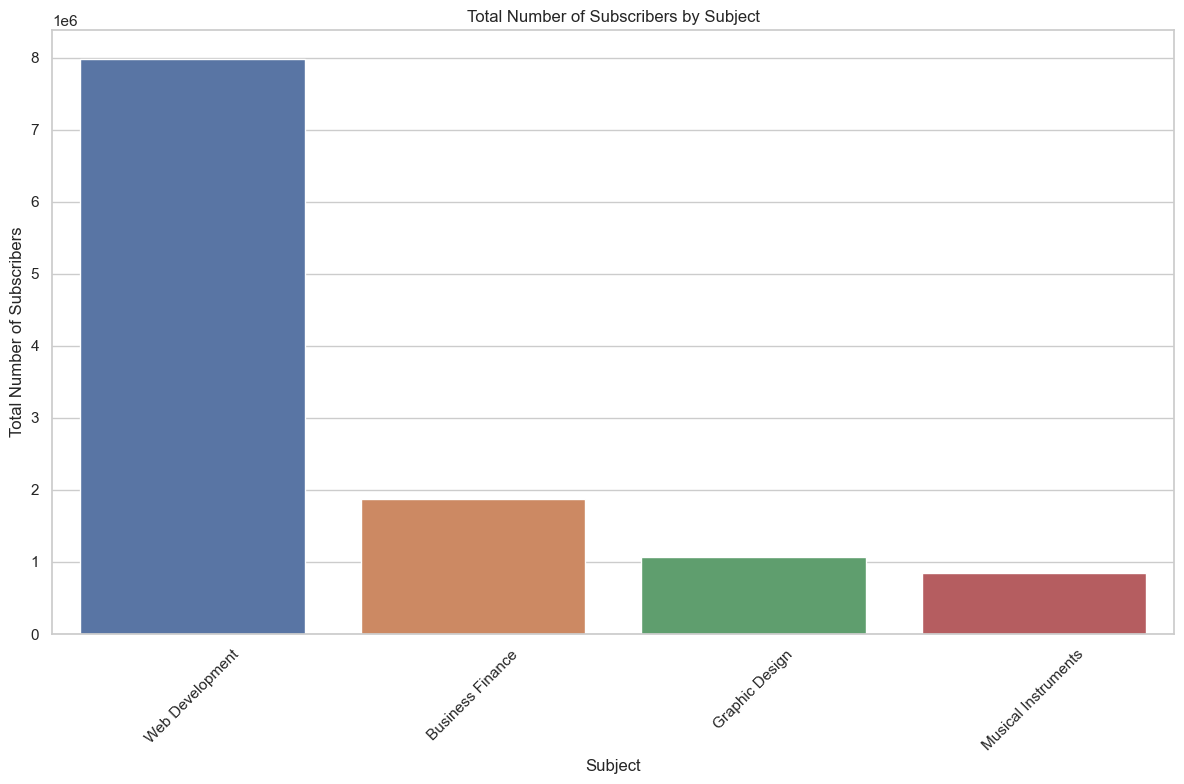

In [37]:
# Calculate the total number of subscribers for each subject
subscribers_by_subject = df.groupby('Subject')['Num_Subscribers'].sum().sort_values(ascending=False)

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(12, 8))

# Create the bar plot
sns.barplot(x=subscribers_by_subject.index, y=subscribers_by_subject.values, ax=ax)

# Set the labels and title
ax.set_xlabel('Subject')
ax.set_ylabel('Total Number of Subscribers')
ax.set_title('Total Number of Subscribers by Subject')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


Business finance shows higher number of subscription than graphic design courses here because there are more business finance courses published than graphic design courses.

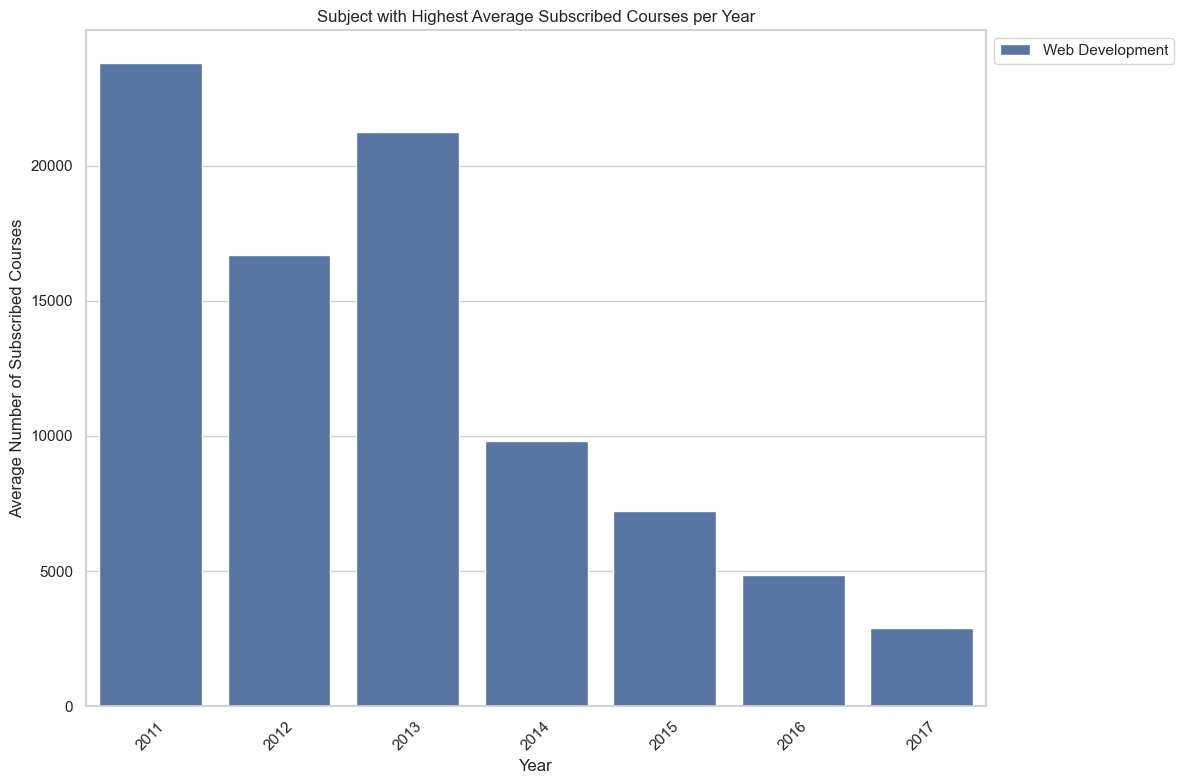

In [38]:
# Group the data by Year and Subject, and calculate the average number of subscribed courses
subject_avg_subscribed_courses = df.groupby(['year', 'Subject']).agg({'Num_Subscribers': 'mean'}).reset_index()

# Identify the subject with the highest average number of subscribed courses for each year
subject_highest_avg = subject_avg_subscribed_courses.groupby('year').apply(lambda x: x.nlargest(1, 'Num_Subscribers')).reset_index(drop=True)

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(12, 8))

# Create the bar plot
sns.barplot(data=subject_highest_avg, x='year', y='Num_Subscribers', hue='Subject', dodge=False, ax=ax)
ax.set_xlabel('Year')
ax.set_ylabel('Average Number of Subscribed Courses')
ax.set_title('Subject with Highest Average Subscribed Courses per Year')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

# Adjust the legend position
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()


Looking at each year, web development courses was subscribed to the most in all the years.

Yet, this doesn't explain why there were less subscribers in 2016 despite the increase in the number of published courses.

In [39]:
# Group the data by year and subject and calculate the count of courses published
courses_published_by_subject = df.groupby(['year', 'Subject'])['Num_Subscribers'].count().reset_index(name='Courses Published')

# Create a stacked bar chart
fig = px.bar(courses_published_by_subject, x='year', y='Courses Published', color='Subject', barmode='stack')

# Set the labels and title
fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Number of Courses Published',
    title='Count of Courses Published per Year by Subject'
)

# Show the plot
fig.show()

Only web development courses were published the first year. 

More courses were published each year in each subjects area but there was reduction in the number of courses published per subject area in 2017.

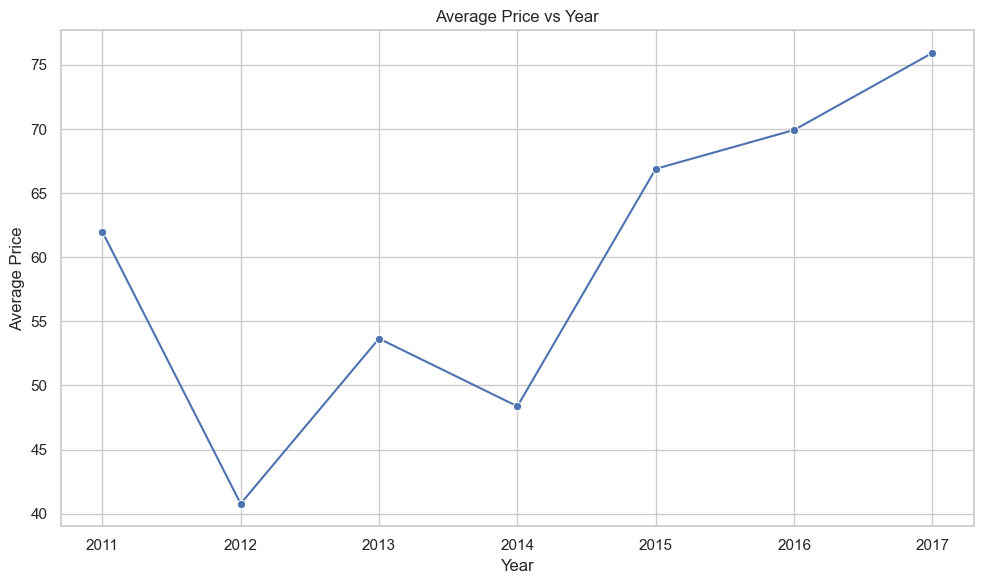

In [40]:
# Calculate the average price per year
average_price_per_year = df.groupby('year')['Price'].mean().reset_index()

# Set the style for the plot
sns.set(style="whitegrid")

# Create a line plot of average price vs year
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='Price', data=average_price_per_year, marker='o')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.title('Average Price vs Year')
plt.tight_layout()
plt.show()


The high rise in price of some courses in 2016 and 2017 must have caused the reduction in the number of subscribers in those two years.

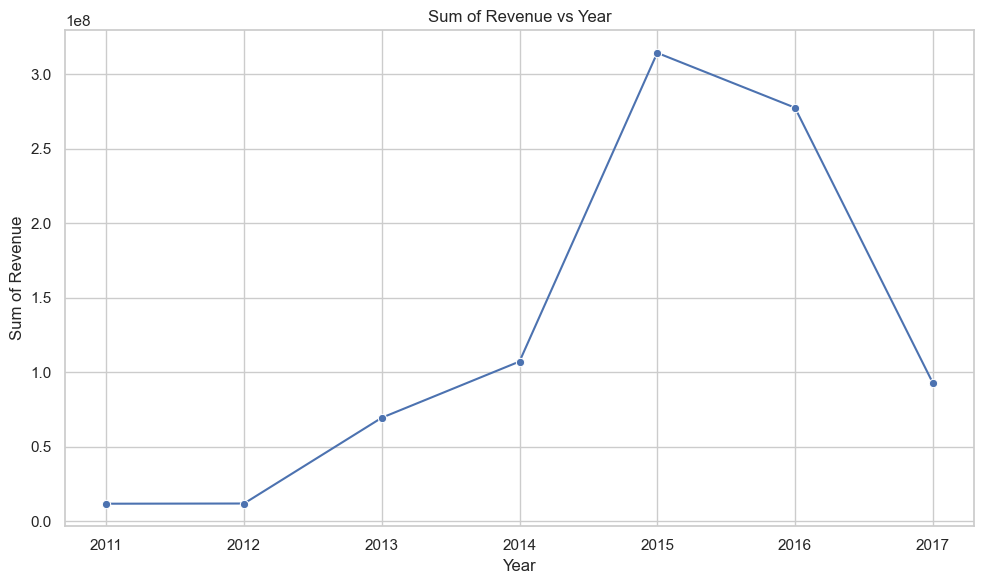

In [41]:
# Convert the 'Revenue' column to numeric type
df['Revenue'] = pd.to_numeric(df['Revenue'])

# Calculate the sum of revenue per year
sum_revenue_per_year = df.groupby('year')['Revenue'].sum().reset_index()

# Set the style for the plot
sns.set(style="whitegrid")

# Create a line plot of sum of revenue vs year
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='Revenue', data=sum_revenue_per_year, marker='o')
plt.xlabel('Year')
plt.ylabel('Sum of Revenue')
plt.title('Sum of Revenue vs Year')
plt.tight_layout()
plt.show()

Increase in price of most of the courses caused a decline in revenue in year 2016 and 2017. The highest revenue was recorded in 2015, followed by 2016. The least revenue generated was in 2011 and 2012 because of the low number of subscribers.

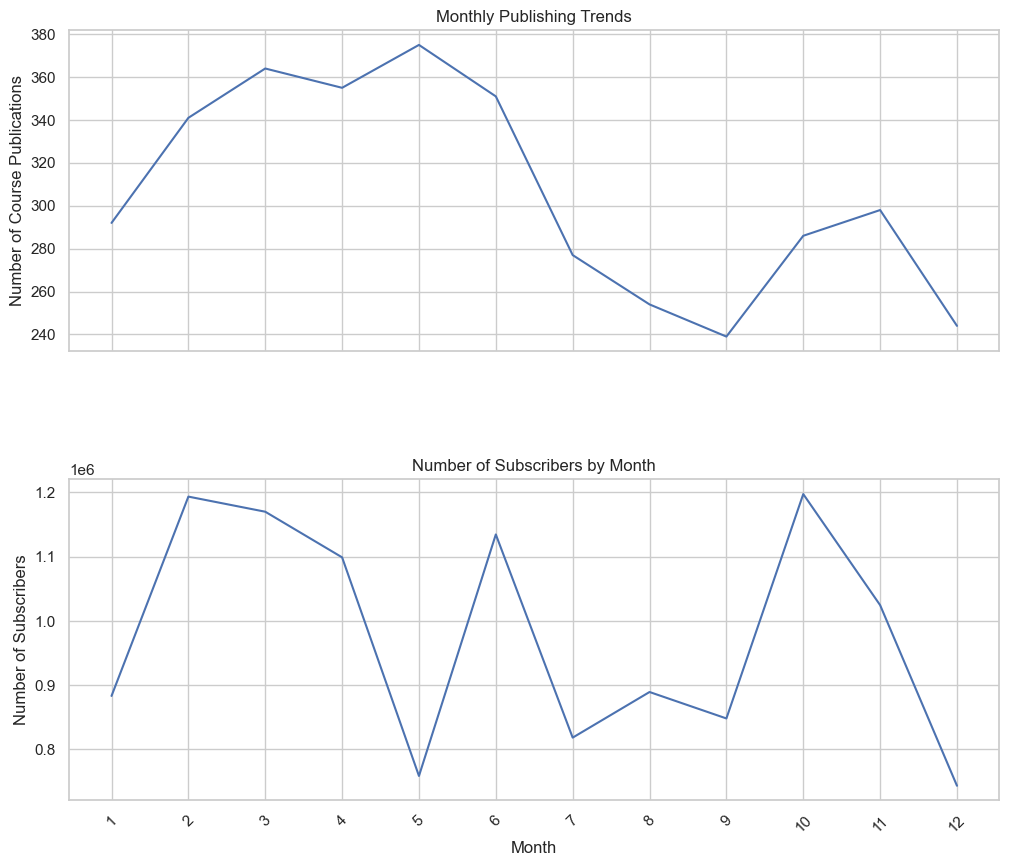

In [42]:
# Group by month and calculate the total number of course publications
monthly_counts = df.groupby('month')['Num_Subscribers'].count()

# Group by month and calculate the total number of subscribers
df_grouped = df.groupby('month').sum()['Num_Subscribers'].reset_index()

# Create a figure with two subplots
fig, axs = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Plotting the monthly publishing trends
axs[0].plot(monthly_counts.index, monthly_counts.values)
axs[0].set_ylabel('Number of Course Publications')
axs[0].set_title('Monthly Publishing Trends')

# Plotting the number of subscribers by month
axs[1].plot(df_grouped['month'], df_grouped['Num_Subscribers'])
axs[1].set_xlabel('Month')
axs[1].set_ylabel('Number of Subscribers')
axs[1].set_title('Number of Subscribers by Month')

# Set x-axis labels for the second subplot
axs[1].set_xticks(df_grouped['month'])
axs[1].set_xticklabels(df_grouped['month'], rotation=45)

# Adjust the spacing between the subplots
plt.subplots_adjust(hspace=0.4)

# Display the combined chart
plt.show()

Monthly Publishing Trends: 

The first graph shows the monthly publishing trends, indicating the number of course publications per month. The months with higher publishing activity are February to June while those with lower publishing activity are July to January. 

By analyzing the peaks and valleys in the line, we can observe that periods of increased releases throughout the year are May, March and April while periods of decreased course releases throughout the year are September and December.


Number of Subscribers by Month: 

The second graph displays the number of subscribers by month, representing the total count of subscribers for each month. This line plot provides an understanding of the subscriber growth or fluctuations over time. 

It is observed that in February, April, June, March, and October, there was a high rise in the number of subscribers while in December, the lowest number of subscribers was recorded, followed by May, July, September, August and January.


By comparing the two graphs side by side, we can observe the potential relationships or patterns between the monthly publishing trends and the number of subscribers:

In March, April and June, increased publishing activity coincide with higher subscriber counts. This suggests a potential correlation between the two variables.

There is a time delay between publishing trends and subscriber count changes. For instance, there is a lag between the release of courses and an increase in the number of subscribers in October and November, and a decrease in the number of subscribers in May.
Courses should be released in the month of October and November, instead of releasing courses in May as there is tendency that subscribers will engage more with courses in those months than in May. 
These insights can help inform decisions related to content creation, marketing strategies, or promotional activities. 

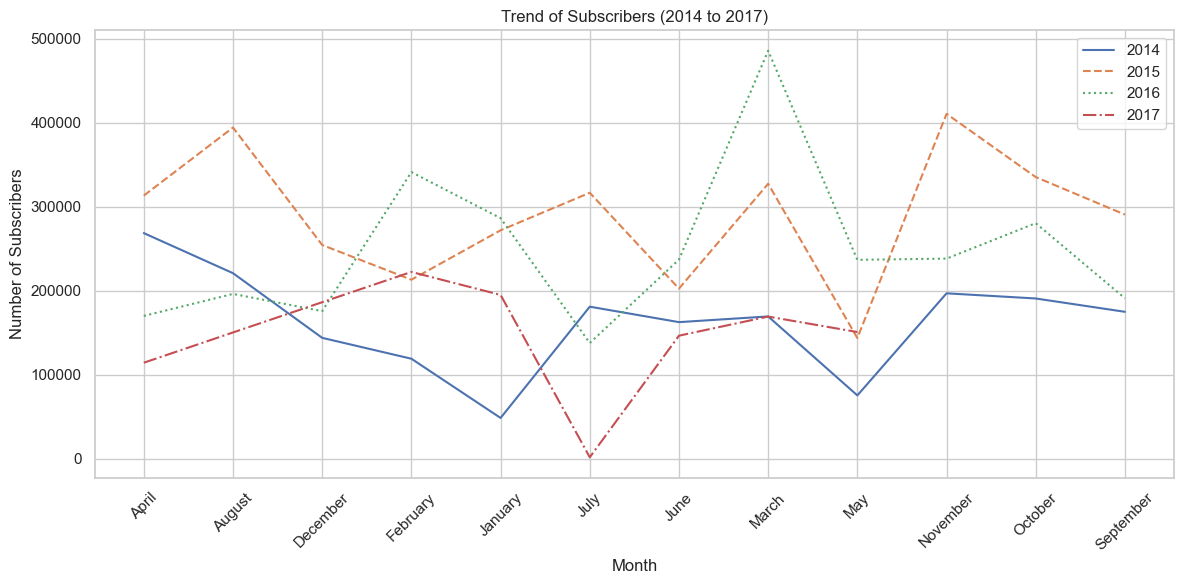

In [43]:
# Filter the data for the desired years
start_year = 2014
end_year = 2017
filtered_df = df[(df['year'] >= start_year) & (df['year'] <= end_year)]

# Group the data by year and month, and calculate the total subscribers
yearly_subscribers = filtered_df.groupby(['year', 'month_name'])['Num_Subscribers'].sum().reset_index()

# Create a separate line for each year
years = yearly_subscribers['year'].unique()

plt.figure(figsize=(12, 6))

# Define line styles for each year
line_styles = ['-', '--', ':', '-.']

# Plot each year's trend separately
for i, year in enumerate(years):
    year_data = yearly_subscribers[yearly_subscribers['year'] == year]
    plt.plot(year_data['month_name'], year_data['Num_Subscribers'], linestyle=line_styles[i], label=str(year))

plt.xlabel('Month')
plt.ylabel('Number of Subscribers')
plt.title('Trend of Subscribers ({} to {})'.format(start_year, end_year))
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()  # Add spacing between lines
plt.show()

Usually in July 2014 and 2015, there was a high rise of subscribers but this is different for 2016 and 2017.

Across the years, there was a decline in the number of subscribers in May.

Across the years, there was a rise in the number of subscribers in March.

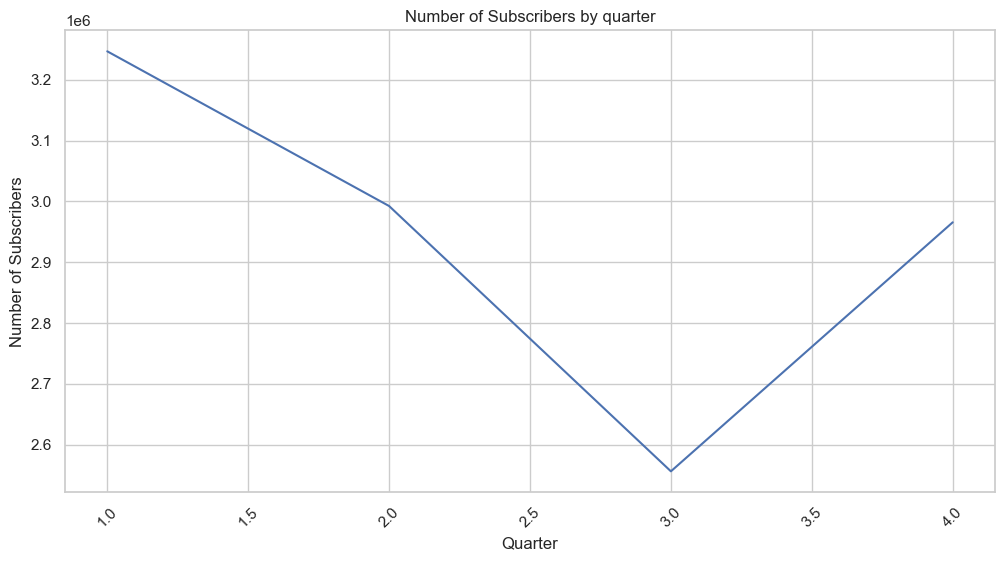

In [44]:
# Group by month and calculate the total number of subscribers
df_grouped = df.groupby('quarter').sum()['Num_Subscribers'].reset_index()

# Plotting the number of subscribers by year
plt.figure(figsize=(12, 6))
plt.plot(df_grouped['quarter'], df_grouped['Num_Subscribers'])
plt.xlabel('Quarter')
plt.ylabel('Number of Subscribers')
plt.title('Number of Subscribers by quarter')
plt.xticks(rotation=45)
plt.show()

In the first quarter (Jan-Mar) of the years, people subscribed the most. There is decline until the 3rd quarter when the number of subscribers began to rise again.

The least number of subscriptions was experienced in the 3rd quarter(Jul-Sep).

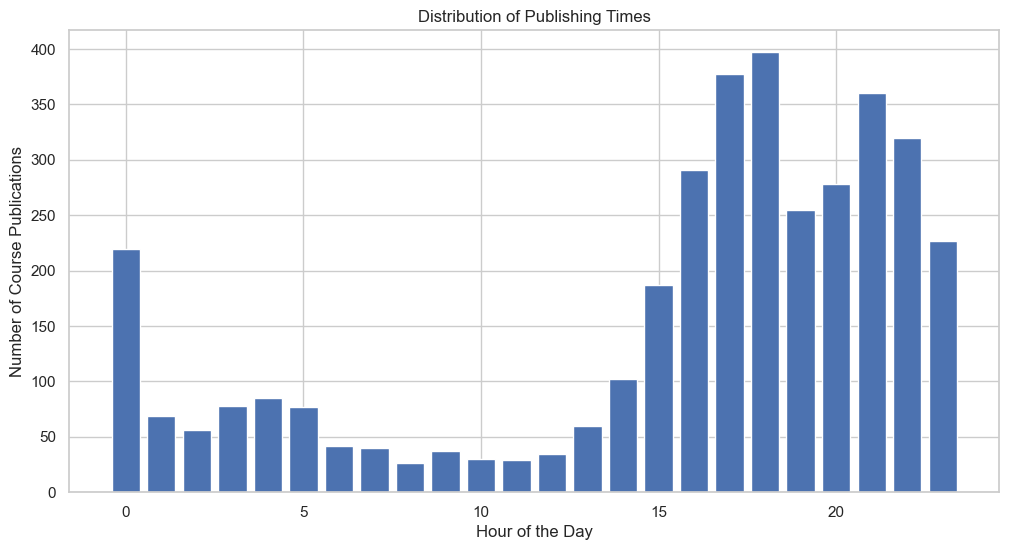

In [45]:
# Extract the hour of the day from the 'Published_Timestamp' column
df['Publishing_Hour'] = df['Published_Timestamp'].dt.hour

# Analyzing Peak Publishing Times
publishing_counts = df['Publishing_Hour'].value_counts().sort_index()

# Plotting the distribution of publishing times
plt.figure(figsize=(12, 6))
plt.bar(publishing_counts.index, publishing_counts.values)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Course Publications')
plt.title('Distribution of Publishing Times')
plt.show()

Courses were frequently published between the 15th to the 0th hours of the day (i.e. between 3pm and 12am).

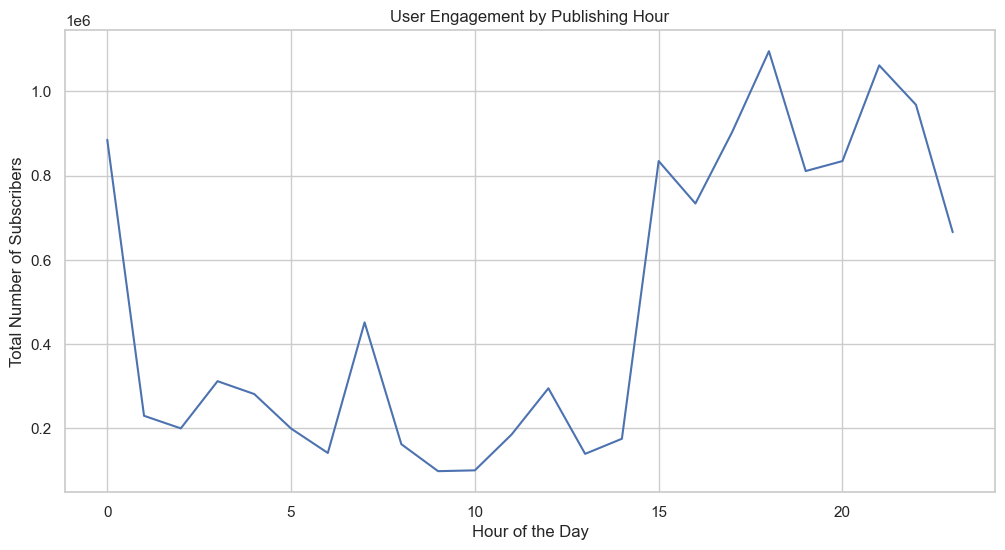

In [46]:
# User Engagement Analysis
hourly_engagement = df.groupby('Publishing_Hour')['Num_Subscribers'].sum()

# Plotting the engagement by publishing hour
plt.figure(figsize=(12, 6))
plt.plot(hourly_engagement.index, hourly_engagement.values)
plt.xlabel('Hour of the Day')
plt.ylabel('Total Number of Subscribers')
plt.title('User Engagement by Publishing Hour')
plt.show()

User Engagement: This shows the total number of subscribers for each publishing hour. The line plot shows the engagement level by hour, allowing us to identify periods of higher user engagement. The high engagement hours are betweeen 15 and 0 hours of the day. This aligns with that of the publishing schedules which should potentially maximize user interaction and enrollment rates.

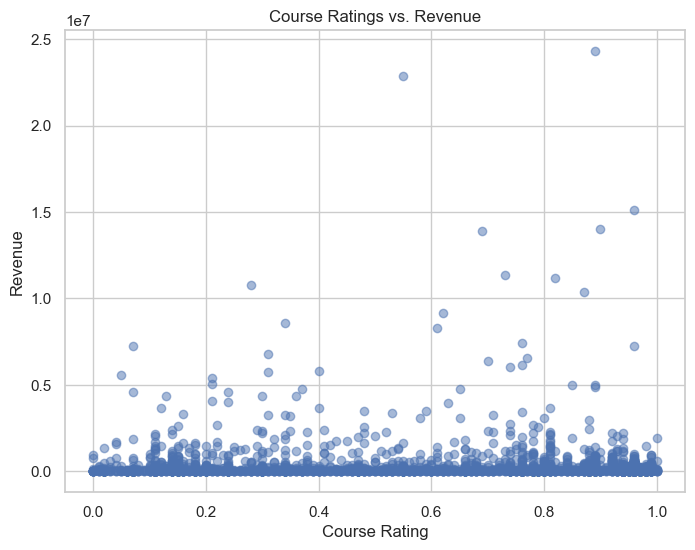

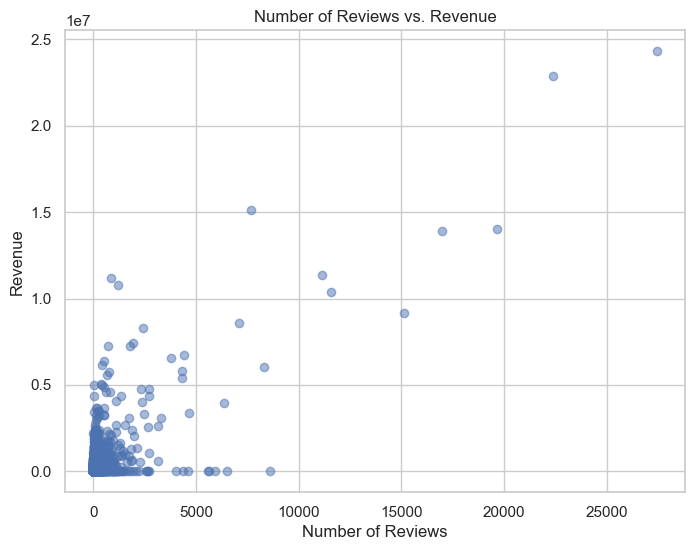

In [47]:
# Scatter plot of Course Ratings vs. Revenue
plt.figure(figsize=(8, 6))
plt.scatter(df['Rating'], df['Revenue'], alpha=0.5)
plt.xlabel('Course Rating')
plt.ylabel('Revenue')
plt.title('Course Ratings vs. Revenue')
plt.show()

# Scatter plot of Number of Reviews vs. Revenue
plt.figure(figsize=(8, 6))
plt.scatter(df['Num_Review'], df['Revenue'], alpha=0.5)
plt.xlabel('Number of Reviews')
plt.ylabel('Revenue')
plt.title('Number of Reviews vs. Revenue')
plt.show()


The more the number of reviews, the higher the revenue.

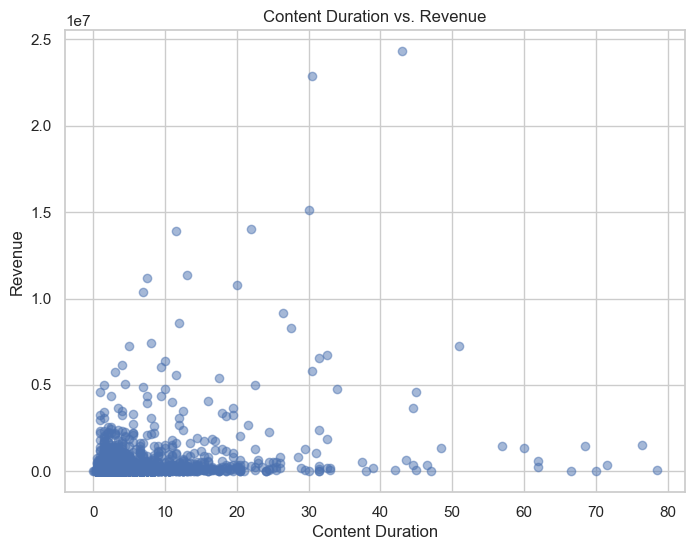

In [48]:
# Scatter plot of Content Duration vs. Revenue
plt.figure(figsize=(8, 6))
plt.scatter(df['Content_Duration'], df['Revenue'], alpha=0.5)
plt.xlabel('Content Duration')
plt.ylabel('Revenue')
plt.title('Content Duration vs. Revenue')
plt.show()


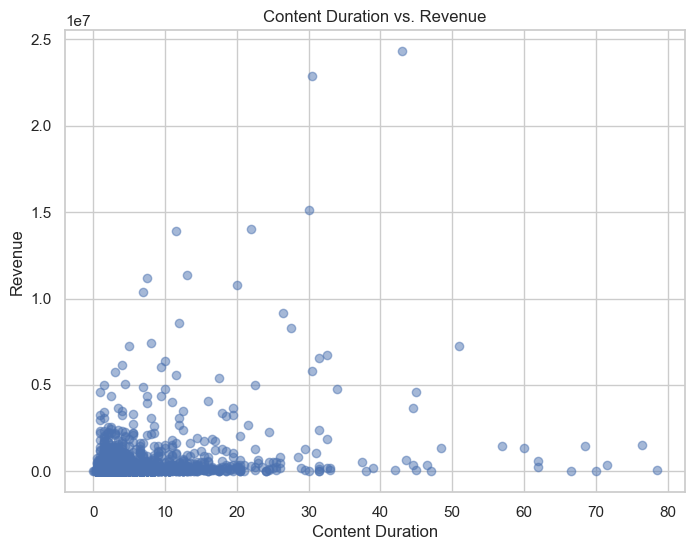

In [49]:
# Scatter plot of Price vs. Revenue
plt.figure(figsize=(8, 6))
plt.scatter(df['Content_Duration'], df['Revenue'], alpha=0.5)
plt.xlabel('Content Duration')
plt.ylabel('Revenue')
plt.title('Content Duration vs. Revenue')
plt.show()

The longer the content duration, the higher the revenue.

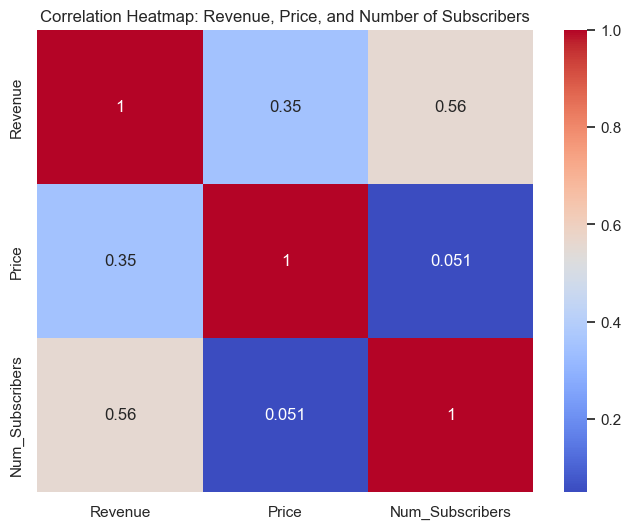

In [50]:
# Select the columns of interest
cols_of_interest = ['Revenue', 'Price', 'Num_Subscribers']
data_subset = df[cols_of_interest]

# Compute the correlation matrix
correlation_matrix = data_subset.corr()

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap: Revenue, Price, and Number of Subscribers')
plt.show()


The map above shows that revenue can be better predicted by the number of subscribers than price.

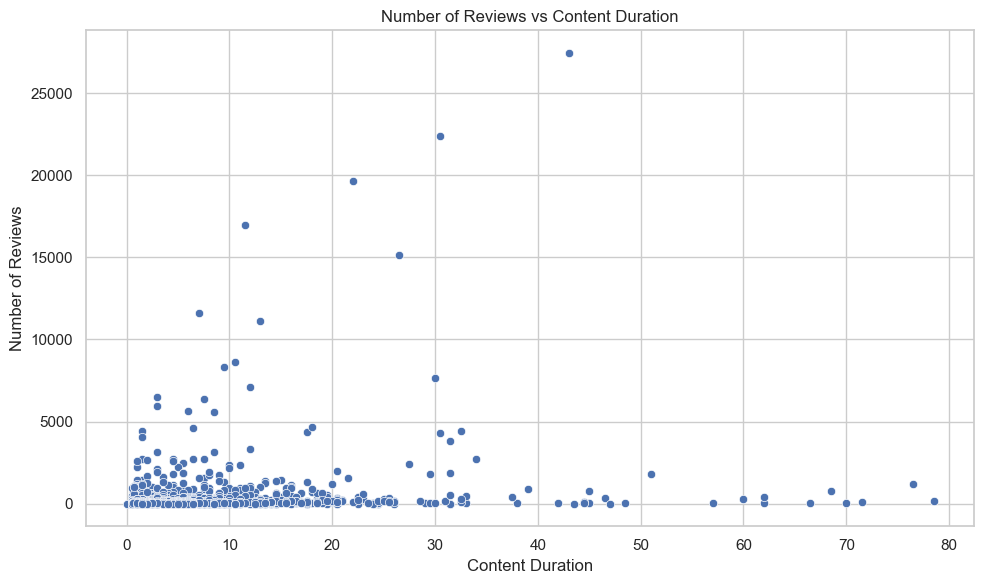

In [51]:
# Set the style for the plot
sns.set(style="whitegrid")

# Create a scatter plot of number of reviews and content duration
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Content_Duration', y='Num_Review', data=df)
plt.xlabel('Content Duration')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews vs Content Duration')
plt.tight_layout()
plt.show()


There is a slight positive correlation between the number of reviews and the content duration of courses. This means that courses with longer content duration receive more reviews from subscribers.

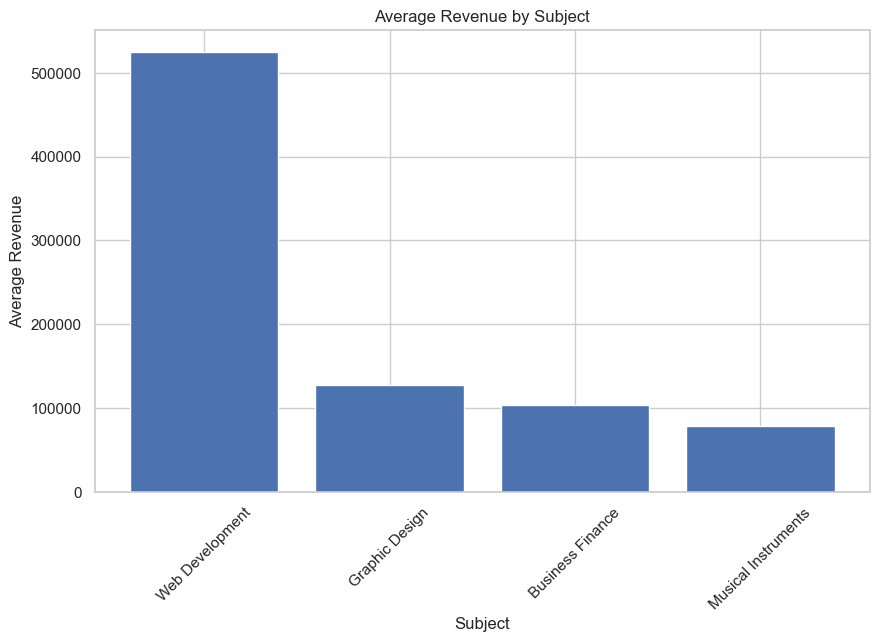

In [52]:
# Calculate average revenue by subject
subject_revenue = df.groupby('Subject').agg({'Revenue': 'mean'}).sort_values('Revenue', ascending=False)

# Bar plot of Average Revenue by Subject
plt.figure(figsize=(10, 6))
plt.bar(subject_revenue.index, subject_revenue['Revenue'])
plt.xlabel('Subject')
plt.ylabel('Average Revenue')
plt.title('Average Revenue by Subject')
plt.xticks(rotation=45)
plt.show()
# Calculate the total revenue per subject
total_revenue_per_subject = df.groupby('Subject')['Revenue'].sum().reset_index()

Web development courses generated the highest revenue.

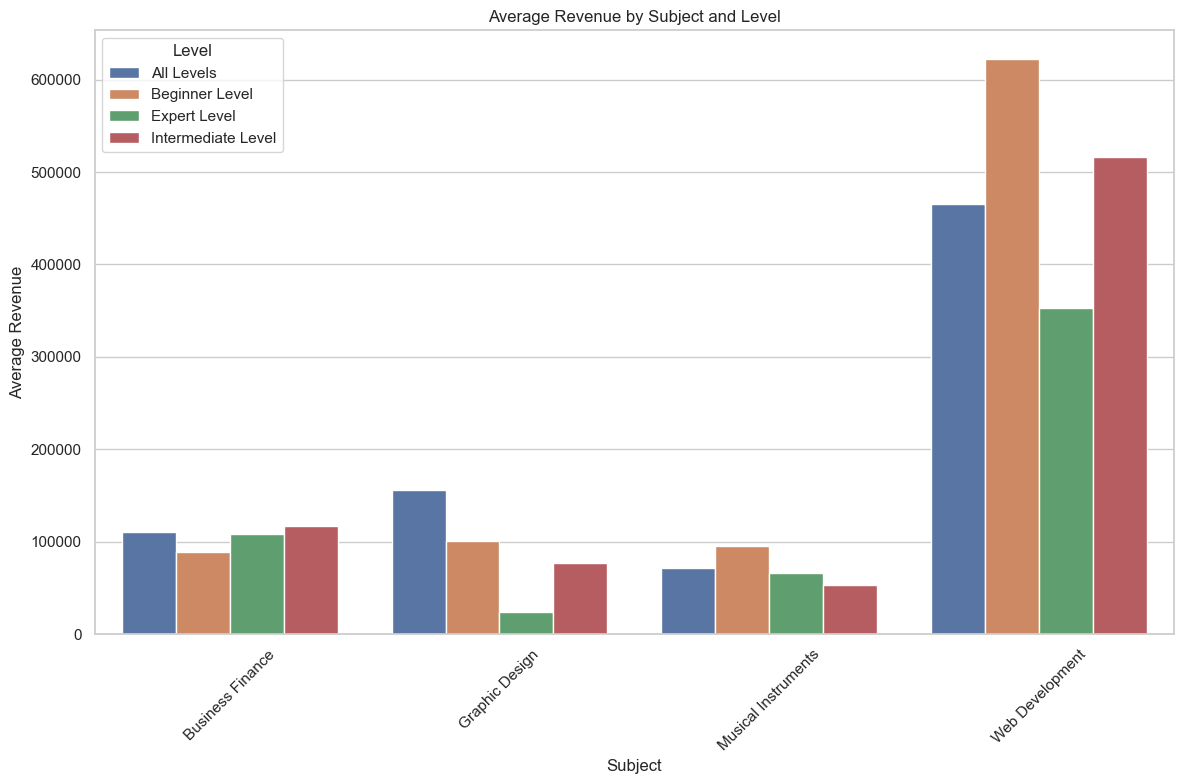

In [53]:
# Calculate average revenue by subject and level
subject_level_revenue = df.groupby(['Subject', 'Level']).agg({'Revenue': 'mean'}).reset_index()

# Set the style for the plot
sns.set(style="whitegrid")

# Create a bar plot of average revenue by subject and level
plt.figure(figsize=(12, 8))
sns.barplot(x='Subject', y='Revenue', hue='Level', data=subject_level_revenue)
plt.xlabel('Subject')
plt.ylabel('Average Revenue')
plt.title('Average Revenue by Subject and Level')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Level')
plt.show()

This plot shows that the highest revenue was obtained from web development intermediate courses while the least was from the Expert level courses. This was due to the fact that Expert level courses published are not as much as the other level we development courses.

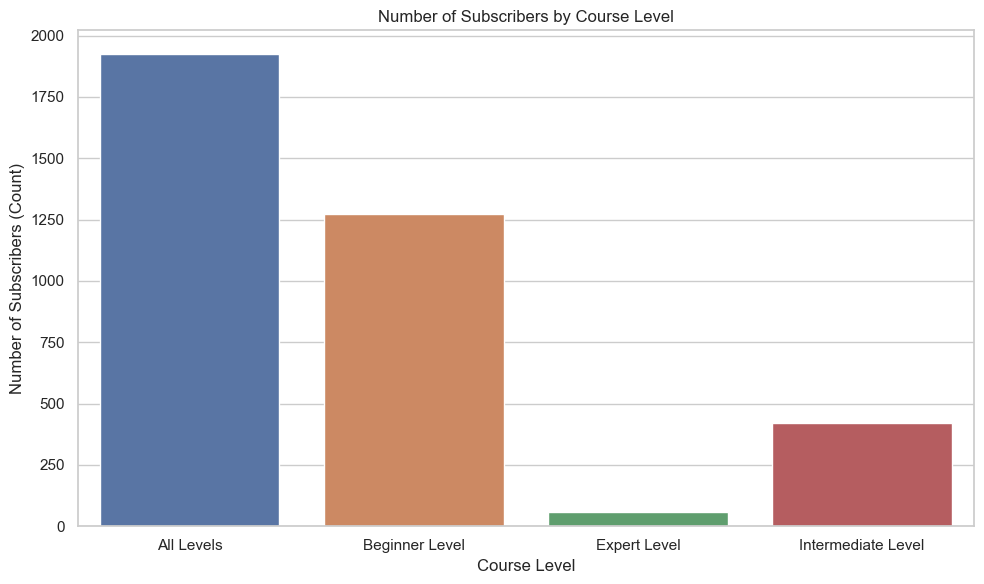

In [54]:
# Set the style for the plot
sns.set(style="whitegrid")

# Group the dataset by course level and calculate the mean number of subscribers
level_subscribers = df.groupby('Level')['Num_Subscribers'].count().reset_index()

# Visualize the level vs number of subscribers
plt.figure(figsize=(10, 6))
sns.barplot(x='Level', y='Num_Subscribers', data=level_subscribers)
plt.xlabel('Course Level')
plt.ylabel('Number of Subscribers (Count)')
plt.title('Number of Subscribers by Course Level')
plt.tight_layout()
plt.show()

In [55]:
#course title with the highest no of reviews, ratings, number of subscribers

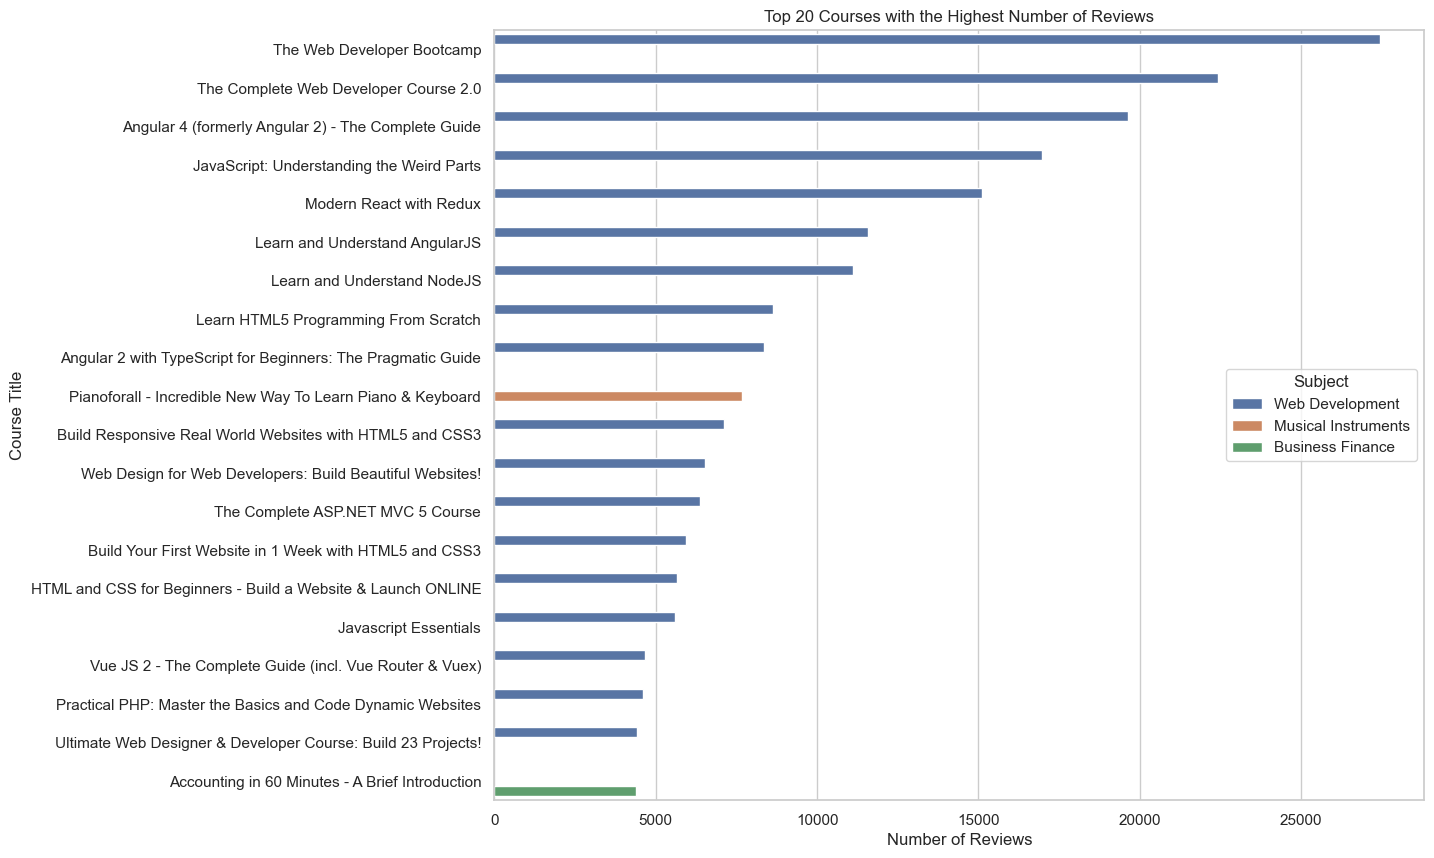

In [56]:
# Sort the dataframe by number of reviews in descending order and select the top 20 courses
top_courses = df.sort_values(by='Num_Review', ascending=False).head(20)

# Extract relevant columns for analysis
columns = ['Course_Title', 'Rating', 'Num_Review', 'Num_Subscribers', 'Price', 'Num_Lectures', 'Level', 'Content_Duration', 'Subject', 'Course_Type']
top_courses_subset = top_courses[columns]

# Plotting the top 20 courses with the highest number of reviews
plt.figure(figsize=(12, 10))
sns.barplot(x='Num_Review', y='Course_Title', hue='Subject', data=top_courses_subset, orient='h')
plt.xlabel('Number of Reviews')
plt.ylabel('Course Title')
plt.title('Top 20 Courses with the Highest Number of Reviews')
plt.legend(title='Subject')
plt.show()


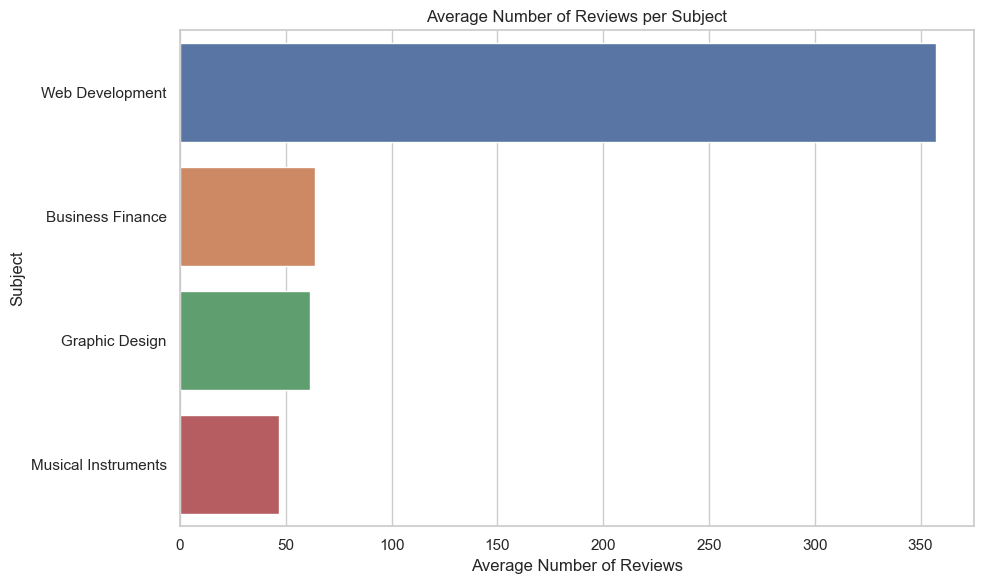

In [57]:
# Calculate the average number of reviews per subject
average_reviews_per_subject = df.groupby('Subject')['Num_Review'].mean().reset_index()

# Sort the subjects based on average number of reviews in descending order
average_reviews_per_subject = average_reviews_per_subject.sort_values(by='Num_Review', ascending=False)

# Set the style for the plot
sns.set(style="whitegrid")

# Create a bar plot of average number of reviews vs subject
plt.figure(figsize=(10, 6))
sns.barplot(x='Num_Review', y='Subject', data=average_reviews_per_subject)
plt.xlabel('Average Number of Reviews')
plt.ylabel('Subject')
plt.title('Average Number of Reviews per Subject')
plt.tight_layout()
plt.show()

Web development courses received the highest average number of reviews.

This shows that web development courses get most engagement and feedback from subscribers.

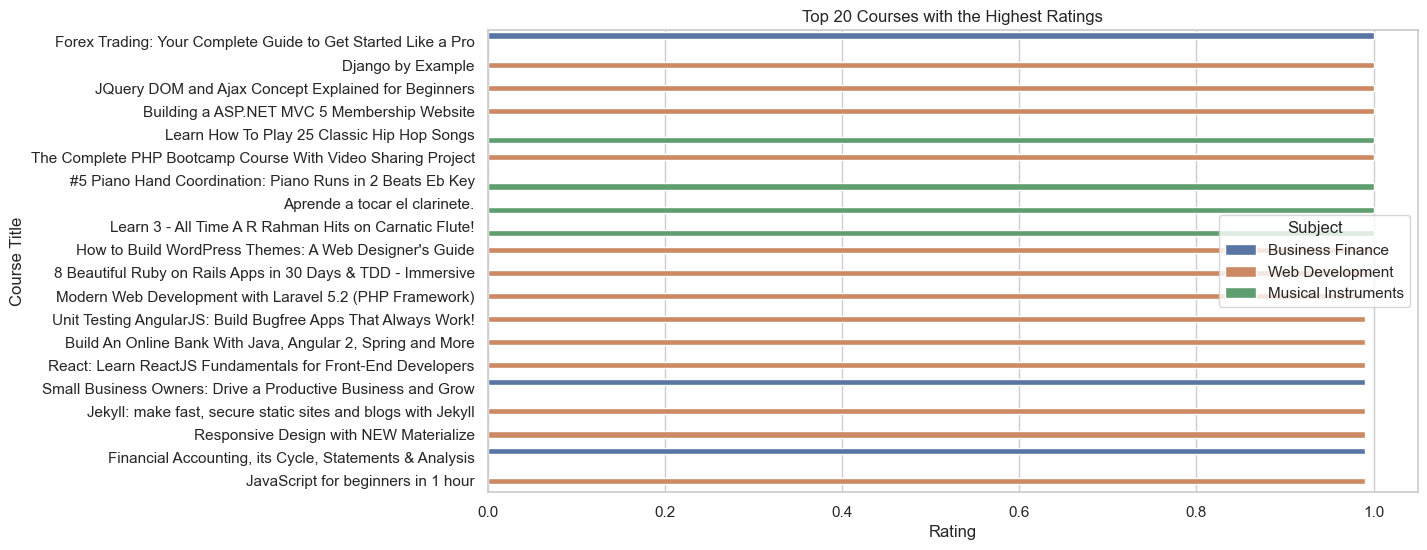

In [58]:
# Sort the dataframe by number of ratings in descending order and select the top 20 courses
top_courses = df.sort_values(by='Rating', ascending=False).head(20)

# Extract relevant columns for analysis
columns = ['Course_Title', 'Rating', 'Num_Review', 'Num_Subscribers', 'Price', 'Num_Lectures', 'Level', 'Content_Duration', 'Subject', 'Course_Type']
top_courses_subset = top_courses[columns]

# Plotting the top 20 courses with the highest ratings
plt.figure(figsize=(12, 6))
sns.barplot(x='Rating', y='Course_Title', hue='Subject', data=top_courses_subset, orient='h')
plt.xlabel('Rating')
plt.ylabel('Course Title')
plt.title('Top 20 Courses with the Highest Ratings')
plt.legend(title='Subject')
plt.show()


It is observed from the above graph that out of the top 20 courses rated high, 13 are web development subject courses, while 3 are business finance courses and 4 are musical instrument courses.

It should also be noted that graphic design courses do not fall into the top 20 rated courses at all.

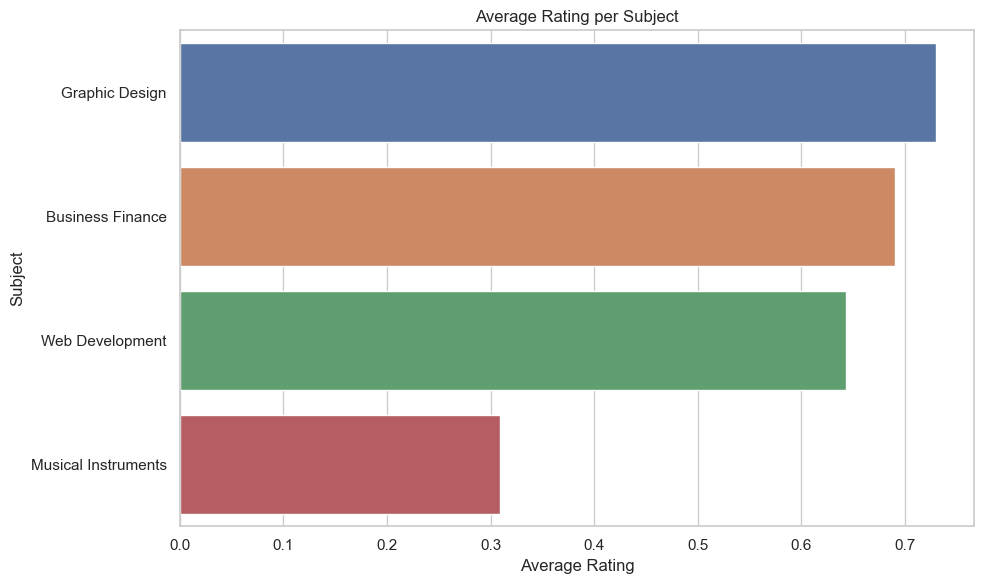

In [59]:
# Calculate the average rating per subject
average_rating_per_subject = df.groupby('Subject')['Rating'].mean().reset_index()

# Sort the subjects based on average rating in descending order
average_rating_per_subject = average_rating_per_subject.sort_values(by='Rating', ascending=False)

# Set the style for the plot
sns.set(style="whitegrid")

# Create a bar plot of average rating vs subject
plt.figure(figsize=(10, 6))
sns.barplot(x='Rating', y='Subject', data=average_rating_per_subject)
plt.xlabel('Average Rating')
plt.ylabel('Subject')
plt.title('Average Rating per Subject')
plt.tight_layout()
plt.show()

Looking at the entire data, Graphic design, business finance and web development courses on average are highly rated above 0.6 while Musical instruments courses on average are poorly rated below average. This is probably why musical instruments courses have low subscription rate.

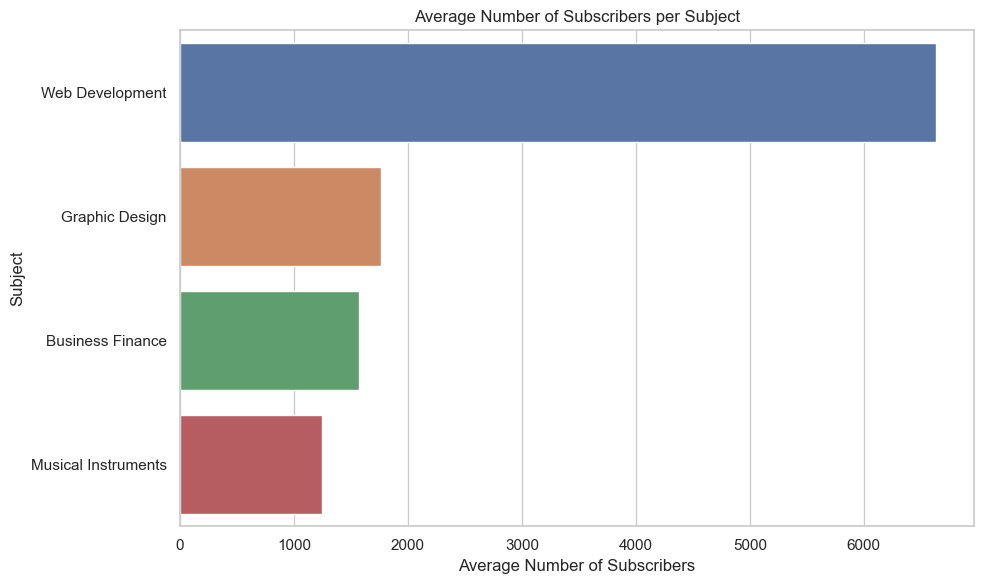

In [60]:
# Calculate the average number of subscribers per subject
average_subscribers_per_subject = df.groupby('Subject')['Num_Subscribers'].mean().reset_index()

# Sort the subjects based on average number of subscribers in descending order
average_subscribers_per_subject = average_subscribers_per_subject.sort_values(by='Num_Subscribers', ascending=False)

# Set the style for the plot
sns.set(style="whitegrid")

# Create a bar plot of average number of subscribers vs subject
plt.figure(figsize=(10, 6))
sns.barplot(x='Num_Subscribers', y='Subject', data=average_subscribers_per_subject)
plt.xlabel('Average Number of Subscribers')
plt.ylabel('Subject')
plt.title('Average Number of Subscribers per Subject')
plt.tight_layout()
plt.show()


In [61]:
# Identify popular courses
popular_courses = df.sort_values(by='Num_Subscribers', ascending=False).head(10)

# Display popular courses with 'Subject'
popular_courses_with_subject = popular_courses[['Course_Title', 'Num_Subscribers', 'Subject']]
print(popular_courses_with_subject)



                                           Course_Title  Num_Subscribers  \
2473               Learn HTML5 Programming From Scratch           268923   
2474                     Coding for Entrepreneurs Basic           161029   
2475                         The Web Developer Bootcamp           121584   
2476  Build Your First Website in 1 Week with HTML5 ...           120291   
2477              The Complete Web Developer Course 2.0           114512   
1793              Free Beginner Electric Guitar Lessons           101154   
2478  Web Design for Web Developers: Build Beautiful...            98867   
2479             Learn Javascript & JQuery From Scratch            84897   
2480  Practical PHP: Master the Basics and Code Dyna...            83737   
2481          JavaScript: Understanding the Weird Parts            79612   

                  Subject  
2473      Web Development  
2474      Web Development  
2475      Web Development  
2476      Web Development  
2477      Web Developme

Narration: 

By examining the bar plot, we can identify the subjects that have attracted the highest total number of subscribers. Courses with Web Development as subject has about 7000 subscribers followed by Graphic design, then business finance. The least is musical instrument. 

The subject with the highest popularity is web development and the least is musical instrument.

The company should prioritize the development or promotion of Web development courses which has the highest subscribers interest.

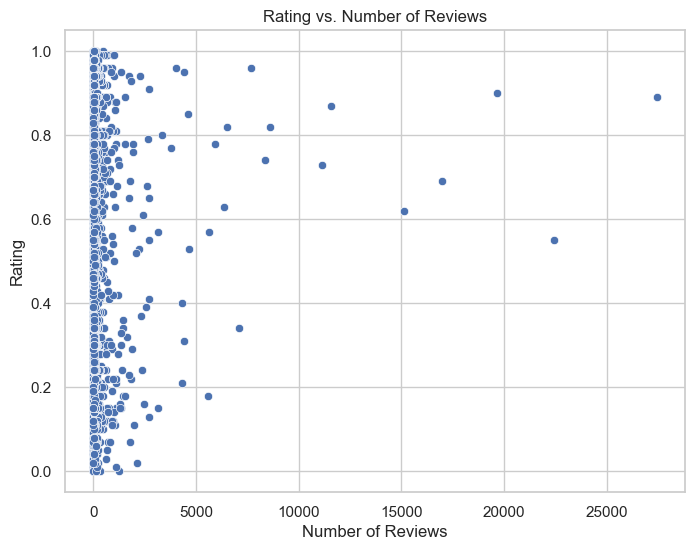

In [62]:
# Create a scatter plot of Rating vs. Num_Review
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Num_Review', y='Rating')
plt.xlabel('Number of Reviews')
plt.ylabel('Rating')
plt.title('Rating vs. Number of Reviews')
plt.show()


Insight: By examining the scatter plot, you can determine if there is any correlation between the number of reviews and the course rating. It can help identify if courses with a higher number of reviews tend to have higher ratings, indicating the influence of reviews on the course reputation.

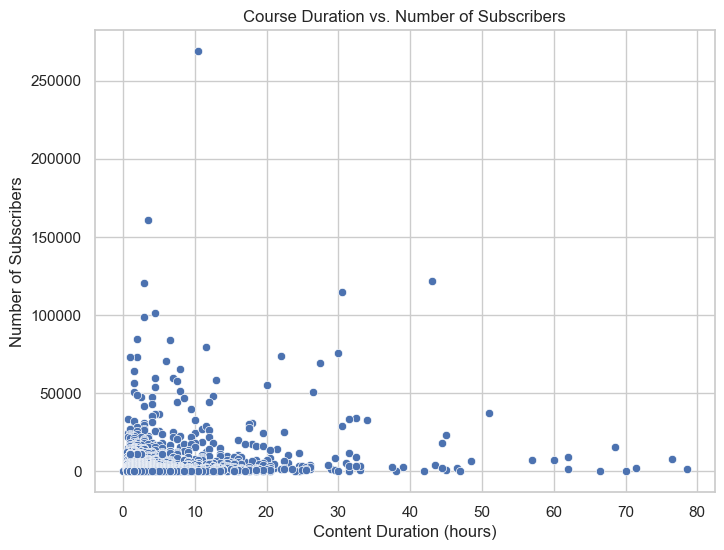

Correlation between Content_Duration and Num_Subscribers: 0.16184381446822643


In [63]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Content_Duration', y='Num_Subscribers')
plt.xlabel('Content Duration (hours)')
plt.ylabel('Number of Subscribers')
plt.title('Course Duration vs. Number of Subscribers')
plt.show()

correlation = df['Content_Duration'].corr(df['Num_Subscribers'])
print("Correlation between Content_Duration and Num_Subscribers:", correlation)


Insight: By examining the scatter plot and calculating the correlation coefficient, you can understand how course duration impacts revenue. A positive correlation suggests that longer courses may attract more subscribers, potentially leading to increased revenue.

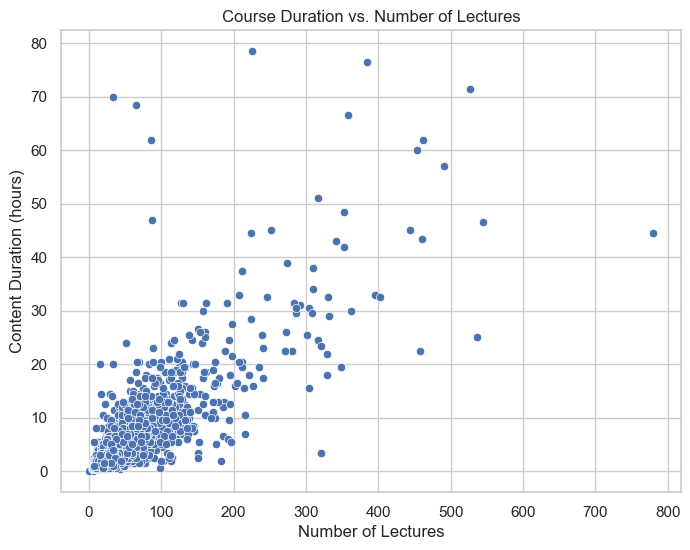

In [64]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Num_Lectures', y='Content_Duration')
plt.xlabel('Number of Lectures')
plt.ylabel('Content Duration (hours)')
plt.title('Course Duration vs. Number of Lectures')
plt.show()

By visualizing the scatter plot, it is observed that there is a positive correlation between the number of lectures and the duration of course content. The positive relationship indicate that courses with more lectures tend to have longer content duration.

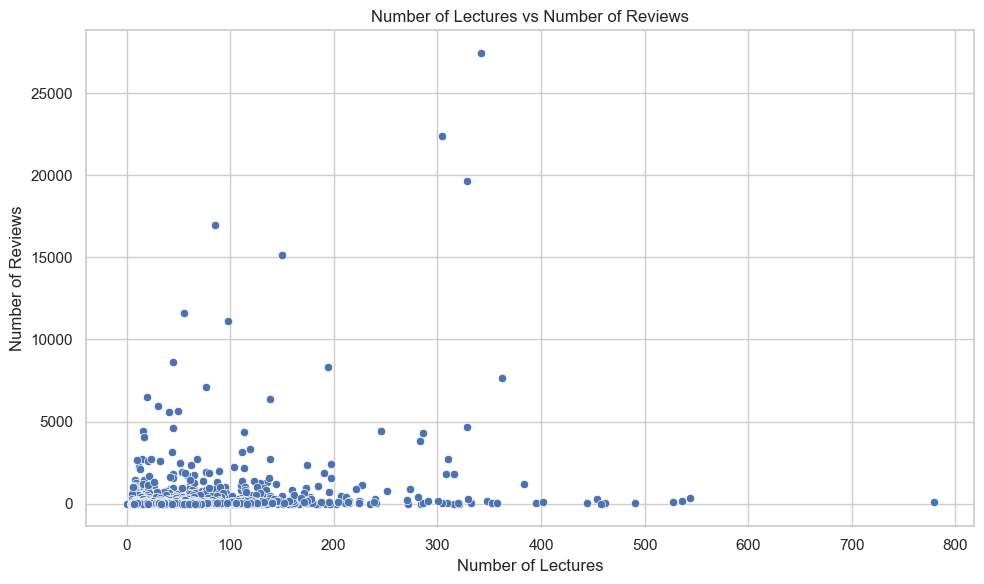

In [65]:
# Set the style for the plot
sns.set(style="whitegrid")

# Create a scatter plot with reversed axes
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Num_Lectures', y='Num_Review', data=df)
plt.xlabel('Number of Lectures')
plt.ylabel('Number of Reviews')
plt.title('Number of Lectures vs Number of Reviews')
plt.tight_layout()
plt.show()

There is a slight positive correlation between the number of reviews and number of lectures. Courses with higher number of lectures receive more reviews from the subscribers.

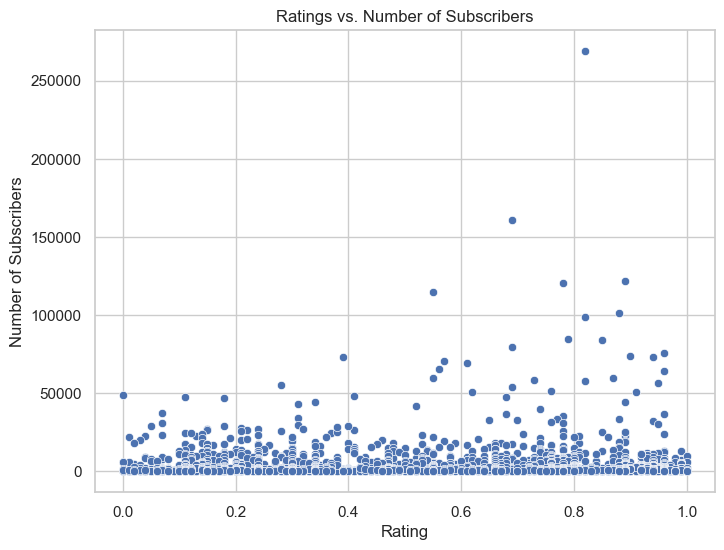

Correlation between Rating and Num_Subscribers: -0.00735344617017536


In [66]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Rating', y='Num_Subscribers')
plt.xlabel('Rating')
plt.ylabel('Number of Subscribers')
plt.title('Ratings vs. Number of Subscribers')
plt.show()

correlation = df['Rating'].corr(df['Num_Subscribers'])
print("Correlation between Rating and Num_Subscribers:", correlation)


By examining the scatter plot and calculating the correlation coefficient, it is observed that the relationship between course ratings and revenue is negative. This suggests that higher-rated courses tend not to attract more subscribers.

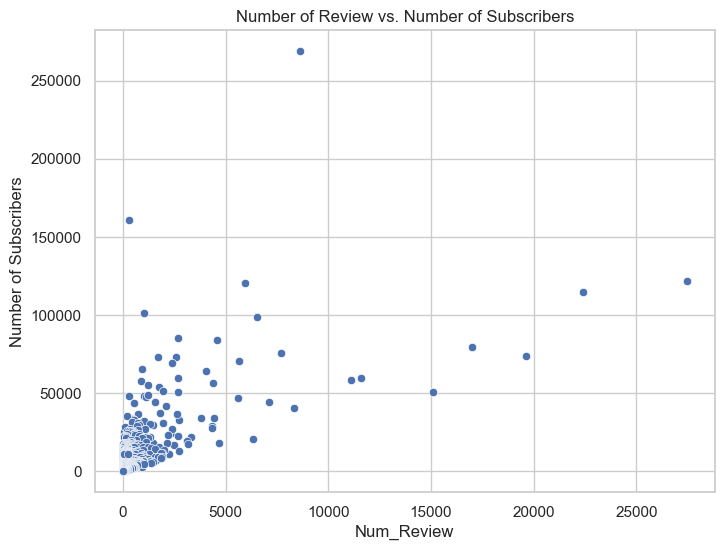

Correlation between Num_Review and Num_Subscribers: 0.650760812271225


In [67]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Num_Review', y='Num_Subscribers')
plt.xlabel('Num_Review')
plt.ylabel('Number of Subscribers')
plt.title('Number of Review vs. Number of Subscribers')
plt.show()

correlation = df['Num_Review'].corr(df['Num_Subscribers'])
print("Correlation between Num_Review and Num_Subscribers:", correlation)


There is a slight positive correlation between the number of subscribers and number of review. There is tendency for more people to subscribe to courses with large number of reviews.

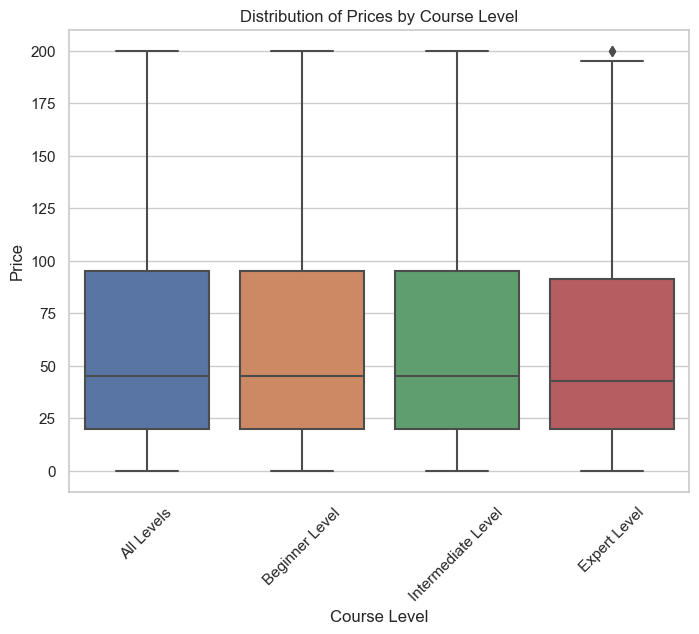

In [68]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Level', y='Price')
plt.xlabel('Course Level')
plt.ylabel('Price')
plt.title('Distribution of Prices by Course Level')
plt.xticks(rotation=45)
plt.show()


By examining the box plot, there are no differences in pricing across different course levels except for the slight difference in the expert level courses with one outlier. 

While there may not be significant pricing differences based on course levels in the dataset, it's essential to conduct a competitive analysis to understand how other platforms or providers price their courses across different levels. This analysis can help identify any potential opportunities for competitive advantage in terms of pricing strategies.

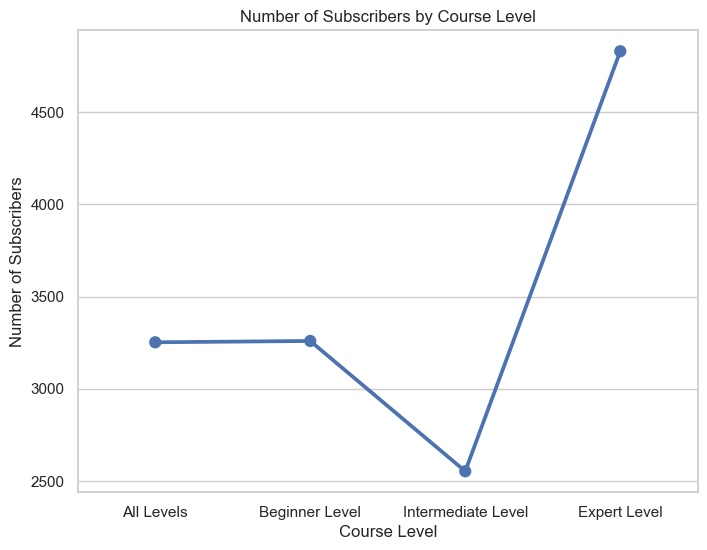

In [69]:
plt.figure(figsize=(8, 6))
sns.pointplot(data=df, x='Level', y='Num_Subscribers', ci=None)
plt.xlabel('Course Level')
plt.ylabel('Number of Subscribers')
plt.title('Number of Subscribers by Course Level')
plt.show()



Expert levels attract the most subscribers and will potentially generate higher revenue if the number of published expert level courses are increased.

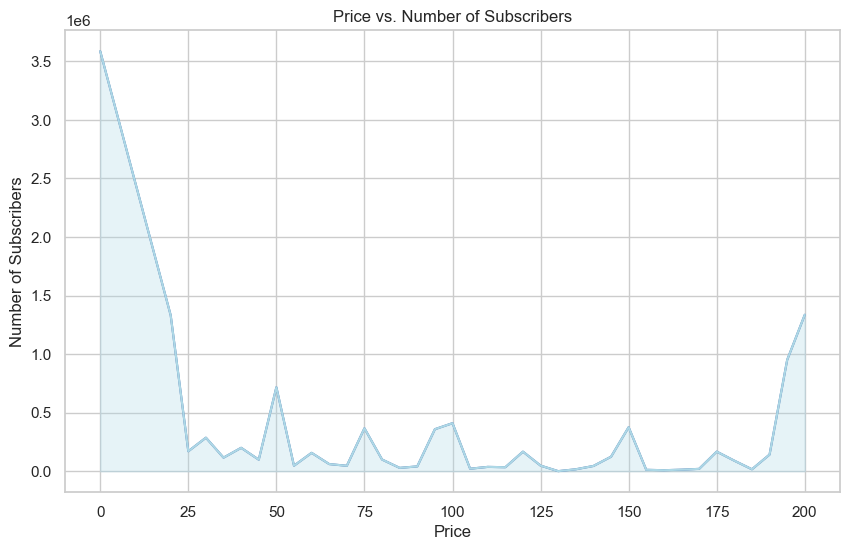

In [70]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df.groupby('Price')['Num_Subscribers'].sum().reset_index(),
             x='Price', y='Num_Subscribers', sort=False)
sns.lineplot(data=df.groupby('Price')['Num_Subscribers'].sum().reset_index(),
             x='Price', y='Num_Subscribers', sort=False, color='lightblue')
plt.xlabel('Price')
plt.ylabel('Number of Subscribers')
plt.title('Price vs. Number of Subscribers')
plt.fill_between(df.groupby('Price')['Num_Subscribers'].sum().reset_index()['Price'],
                 df.groupby('Price')['Num_Subscribers'].sum().reset_index()['Num_Subscribers'],
                 color='lightblue', alpha=0.3)
plt.show()


Free courses attracted more suscribers.

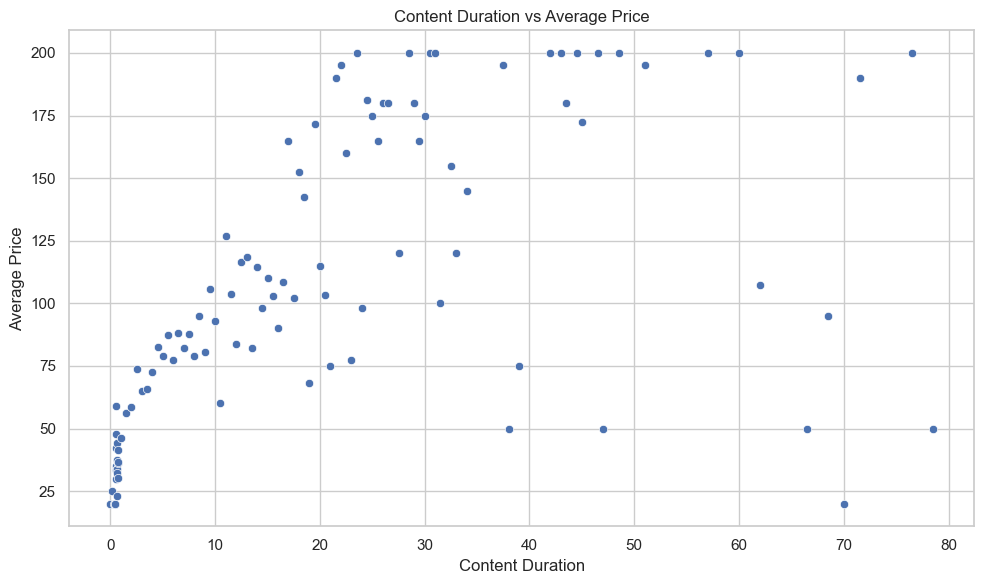

In [72]:
# Calculate the average price per content duration category
average_price_per_duration = df.groupby('Content_Duration')['Price'].mean().reset_index()

# Set the style for the plot
sns.set(style="whitegrid")

# Create a scatter plot of content duration and average price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Content_Duration', y='Price', data=average_price_per_duration)
plt.xlabel('Content Duration')
plt.ylabel('Average Price')
plt.title('Content Duration vs Average Price')
plt.tight_layout()
plt.show()


The higher the content duration of courses, the higher the average price of the courses.

Limitation

Lack of data on the marketing channel makes it impossible to identify the marketing channels that have contributed the most to the total number of subscribers. This might help to allocate resources effectively by focusing on the most successful marketing channels.

Inability to be able to compare competitors' pricing and offerings. This analysis would have helped to identify any gaps or opportunities where the courses can differentiate themselves in terms of pricing.

### Forecasting

In [73]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Group by year and calculate the average revenue
df_grouped = df.groupby('year').sum()['Revenue'].reset_index()

# Prepare the data
years = df_grouped['year']
revenue = df_grouped['Revenue']

# Define the range of p, d, q values for the ARIMA model
p_values = range(0, 3)  # Adjust the range as per your requirements
d_values = range(0, 3)
q_values = range(0, 3)

best_aic = float('inf')
best_order_aic = None
best_bic = float('inf')
best_order_bic = None

# Find the best order using AIC and BIC
for p in p_values:
    for d in d_values:
        for q in q_values:
            order = (p, d, q)
            try:
                model = ARIMA(revenue, order=order)
                model_fit = model.fit()

                # Calculate AIC and BIC
                aic = model_fit.aic
                bic = model_fit.bic

                if aic < best_aic:
                    best_aic = aic
                    best_order_aic = order

                if bic < best_bic:
                    best_bic = bic
                    best_order_bic = order

            except:
                continue

# Print the best order based on AIC and BIC
print("Best Order (AIC):", best_order_aic)
print("Best Order (BIC):", best_order_bic)


C:\Users\EZ FARMING\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\EZ FARMING\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.

C:\Users\EZ FARMING\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.

C:\Users\EZ FARMING\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.

C:\Users\EZ FARMING\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

No

Best Order (AIC): (0, 2, 0)
Best Order (BIC): (0, 2, 0)


C:\Users\EZ FARMING\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.



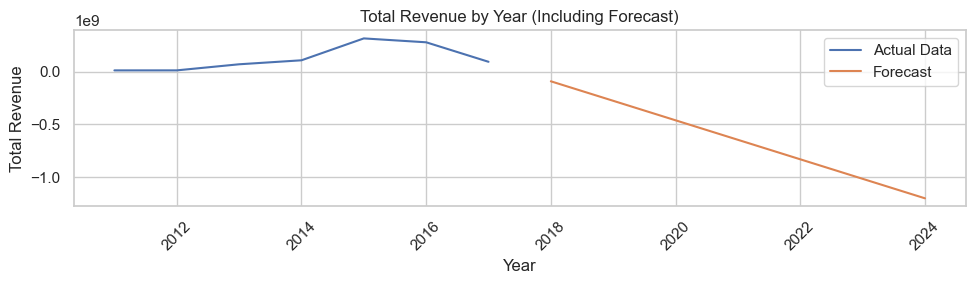

Mean Absolute Error (MAE): 772377914.2857139
Mean Squared Error (MSE): 7.997024808960429e+17
Root Mean Squared Error (RMSE): 894260857.2983853


In [74]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Group by year and calculate the average revenue
df_grouped = df.groupby('year').sum()['Revenue'].reset_index()

# Prepare the data
years = df_grouped['year']
revenue = df_grouped['Revenue']

# Fit the ARIMA model
model = ARIMA(revenue, order=(0, 2, 0))  # Adjust the order as per your data
model_fit = model.fit()

# Forecast for the next 7 years (assuming 1 year is equivalent to 1 time period)
forecast_steps = 7
forecast = model_fit.forecast(steps=forecast_steps)

# Create the future year range for the forecasted values
future_years = range(years.max() + 1, years.max() + forecast_steps + 1)

# Calculate the evaluation metrics
actual_values = revenue[-forecast_steps:]
mae = mean_absolute_error(actual_values, forecast)
mse = mean_squared_error(actual_values, forecast)
rmse = np.sqrt(mse)

# Plot the actual data and the forecasted values
plt.figure(figsize=(10, 3))
plt.plot(years, revenue, label='Actual Data')
plt.plot(future_years, forecast, label='Forecast')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Year (Including Forecast)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Print the evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)


C:\Users\EZ FARMING\AppData\Local\Temp\ipykernel_15200\1651438072.py:33: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\EZ FARMING\Anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Linear Regression MAE: 65690538.775517054
Random Forest MAE: 26803504.857142854
Support Vector Regression MAE: 86649200.00524487


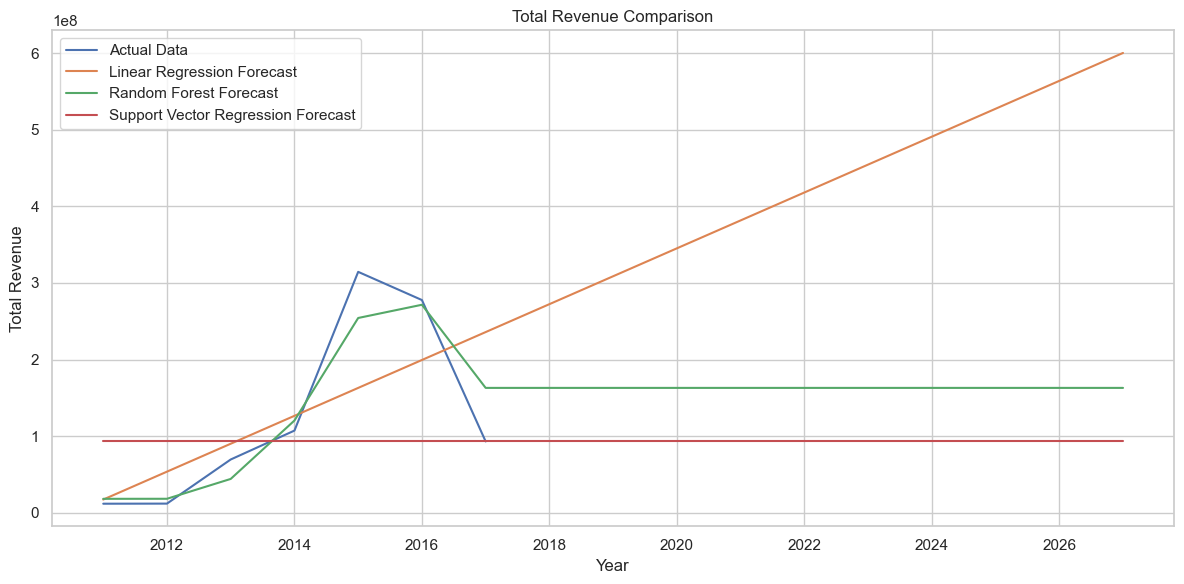

In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error

# Group by year and calculate the total Revenue
df_grouped = df.groupby('year').sum()['Revenue'].reset_index().reset_index()

# Prepare the data
years = df_grouped['year']
Revenue = df_grouped['Revenue']

# Split the data into train and test sets
train_size = int(len(Revenue) * 0.8)  # 80% for training
train_years = years[:train_size]
train_data = Revenue[:train_size]
test_years = years[train_size:]
test_data = Revenue[train_size:]

# Initialize the models
models = [
    ('Linear Regression', LinearRegression()),
    ('Random Forest', RandomForestRegressor()),
    ('Support Vector Regression', SVR())
]

# Extend the forecast for an additional 10 years
extended_years = range(min(years), max(years) + 11)

# Fit the models and calculate MAE
results = []
for model_name, model in models:
    model.fit(years.values.reshape(-1, 1), Revenue.values.reshape(-1, 1))
    forecast = model.predict(pd.DataFrame(extended_years).values.reshape(-1, 1))
    mae = mean_absolute_error(Revenue, forecast[:len(Revenue)])
    results.append((model_name, mae))

# Print the MAE for each model
for model_name, mae in results:
    print(model_name + " MAE:", mae)

# Plot the actual data and the forecasts
plt.figure(figsize=(12, 6))
plt.plot(years, Revenue, label='Actual Data')
for model_name, model in models:
    forecast = model.predict(pd.DataFrame(extended_years).values.reshape(-1, 1))
    plt.plot(extended_years, forecast, label=model_name + " Forecast")
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.title('Total Revenue Comparison')
plt.legend()
plt.tight_layout()
plt.show()

Focus will be on the forecast generated by the random forest model because it has the least Mean Absolute Error. It can be observed that revenue would continue to decrease in the subsequent years (>=2018) if actions are not taken to attract more subscribers.

## Insights

### Top 20 Courses by Subscribers

#### It was observed that out of the top 20 most popular courses in terms of enrollment, 17 belong to the Web development subject while 2 belong to the Musical Instrument and then the last one belong to the business finance subject. Most o these couses are free,

###  Course Subjects

#### Looking at the entire dataset, the most prevalent subject area on avearge is Web development followed by Graphics design, then Business finance.


### Price Analysis
#### Majority of the subscribers subscribed to Free courses. However, despite the increase in price customers subscribed to courses with expensive and very expensive courses because probably they got value for their money. 
#### The high rise in price of some courses in 2016 and 2017 caused the reduction in the number of subscribers in those two years.

### Content Duration Analysis 
#### The relationship between content duration and the number of subscribers is positive. This shows that the learner prefers courses with longer duration. This suggests that longer courses may attract more subscribers, potentially leading to increased revenue.

###  Revenue Analysis 
####  Increase in price of most of the courses caused a decline in revenue in year 2016 and 2017. The highest revenue was recorded in 2015, followed by 2016. 
#### Web Development subjects generated the highest revenue, followed by Business finance, then graphic design and the least revenue was generated from Musical instruments subject courses.


### Course Level Analysis
#### Expert Level website development courses have the highest average number of subscribers than the other levels because the prices are cheap. Beginner and All levels graphic design courses have more average number of subscribers than the other levels. All levels and Expert level musical instrument courses have more average average number of subscribers than the other levels. These imply a larger customer base, which can translate to more revenue through course fees or other monetization strategies. Also, it may be that majority of the subscribers are new to the courses and so, they want to learn at all levels or start with the Beginner level courses.



### Course Quality Evaluation

#### RATINGS
#### Higher ratings and positive reviews generally indicate a higher course quality. However, in this case, it is better to stick to the use of average ratings because we do not from the data if reviews are positive or negative. Looking at the entire data, Graphic design, business finance and web development courses on average are highly rated above 0.6 while Musical instruments courses on average are poorly rated below average. This is probably why musical instruments courses have low subscription rate.


#### REVIEWS (User Engagement)
#### Web development courses received the highest average number of reviews. This shows that web development courses get most engagement and feedback from subscribers.


Recommendations:

#### More expert level web development courses should be published as people tend to subscribe more to the expert web development courses. 

#### The company should however try to work on increasing the quality of the musical instrument courses so as to attract more subscribers into the field. Also, efforts should be made to increase the quality of the other remaining subject courses most especially Web development courses so that their average ratings could be above 0.8. Although web development courses are mostly subscribed, increasing the quality of the course would make the company have a higher competitive advantage over other e-learning websites. In addition, more graphic design courses should be published as there is a high tendency that more people would subscribe to the courses thereby increasing the company's revenue.

#### Web development courses received the highest average number of reviews. It is however recommended that courses in other subject areas should be prepared to encourage student engagement through discussions, exercises, quizzes, or assignments. Interactive elements can enhance the learning process and keep students engaged.

#### Musical intrument courses had the least average ratings and review. The company should however try to work on increasing the quality of the musical instrument courses so as to attract more subscribers into the field or should just remove most of the courses without subscription.

#### More graphic design courses should be published as there is a high tendency that more people would subscribe to the courses thereby increasing the company's revenue.

#### There are about 65 courses not subscribed to. These courses should be replaced with people's preferences or be made attractive to people to subscribe to either by adjusting prices or providing potential subscribers other juicy offers making the course free and later asking them to pay for the certificates.

#### Content Duration Optimization: Learners subscribed more to courses with content duration less than 50 hours. The company can adjust course lengths accordingly to meet learner expectations.

#### There is need to focus on improving course quality by addressing feedback from reviews and ratings, ensuring comprehensive and well-structured content, and maintaining high production value.

#### Highlighted courses with high ratings and positive reviews to should be promoted to attract more learners and increase enrollment.

#### Continuous Improvement: Regularly review and update course content to ensure it remains relevant and up-to-date with industry trends and learner expectations.

#### Engage Learners: Incorporate interactive elements and opportunities for student engagement within courses to enhance the learning experience and increase learner satisfaction.

#### Provide Support and Resources: Offer supplementary materials, resources, and a user-friendly learning platform to support learners and facilitate their progress.

#### Increase in price of most of the courses caused a decline in revenue in year 2016 and 2017. The highest revenue was recorded in 2015, followed by 2016. The least revenue generated was in 2011 and 2012 because of the low number of subscribers. Prices should be adjusted across board so that more subscribers can be attracted. The higher the subscribers, the more the revenue.

#### Most of the courses should be released in the month of October and November, instead of May as there is tendency that subscribers will engage more with courses in those months than in May. 


#### Customer Feedback: Continuously gather and analyze customer feedback on pricing. This can be done through surveys, reviews, or direct communication with learners. By understanding their perception of pricing and value, the company can make data-driven decisions to optimize pricing strategies and meet customer expectations.

### In conclusion, the forecast done showed that if actions are not taken in response to the above insights and recommendations, the number of subscribers will continue to fall and thereby causing further reduction in revenue generated by the company.
